# [RQ1]

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import scipy.stats as ss
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
import scipy.stats as ss
from scipy.stats import chi2_contingency
from scipy.stats import chi2

## Import the team data

In [2]:

team=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json")
pd.set_option('display.max_rows', 142)
pd.set_option('display.max_columns', 12)


In [3]:
#convert the area from a series to a list
#Convert the list into a dataframe and concate the dataframe to the parent data i.e. team.
#Drop the column 'area'
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)
#From index 98, the type is given as Nation. So we don't need that.
team=team[:98]
team.head()

,city,name,wyId,officialName,type,name,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES


#### Note that column 2 and column 9 are both called 'name'

In [4]:
# changing column name: The column tht contains the country names is converted into "country"
t=list(team.columns)
t[5]='country'
t
team.columns=t
team.head()

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES


#### Adding necessary filters

In [5]:
#As this is premier league, we need information solely based on England.
team=team[(team['alpha3code']=='XEN')&(team['type']=='club')|(team['name']=='Swansea City')]

#### Note that the index is not increasing by 1, instead it is 0, 8, 26 ...

#### This can be problematic in case this dataframe is merged/joined/concatinated to some other dataframe as these functions work on the basis of indices

In [6]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team=team.reset_index(drop=True)
team.head()

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,club,England,0,XEN,
2,Swansea,Swansea City,10531,Swansea City AFC,club,Wales,0,XWA,
3,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,club,England,0,XEN,
4,"Brighton, East Sussex",Brighton & Hove Albion,1651,Brighton & Hove Albion FC,club,England,0,XEN,


##  Import the matches data

In [7]:
matches= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_England.json')
pd.set_option('display.max_columns', 14)
matches.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364


#### ${\bullet}$ Split the columns 'label' to extract the information of the teams and scores of the match

In [9]:
results = matches.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results
# results.columns = ['result_home','result_away']
results = pd.concat([matches['gameweek'],results,matches.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results.head()

,gameweek,goal_home,goal_away,team_home,team_away
0,38,1,2,Burnley,AFC Bournemouth
1,38,2,0,Crystal Palace,West Bromwich Albion
2,38,0,1,Huddersfield Town,Arsenal
3,38,4,0,Liverpool,Brighton & Hove Albion
4,38,1,0,Manchester United,Watford


#### ${\bullet}$ Generating the points table for the entire league

In [11]:
results['points_home'] = 0
results['points_away'] = 0
for i in range(results.shape[0]):
    if results.loc[i,'goal_home']>results.loc[i,'goal_away']:
        results.loc[i,'points_home']=3
    elif results.loc[i,'goal_home']<results.loc[i,'goal_away']:
        results.loc[i,'points_away']=3
    else:
        results.loc[i,'points_home']=1
        results.loc[i,'points_away']=1

In [12]:
home = results[['gameweek','team_home','points_home']]
away = results[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table

,gameweek,team,points
0,1,AFC Bournemouth,0
1,1,Arsenal,3
2,1,Brighton & Hove Albion,0
3,1,Burnley,3
4,1,Chelsea,0
...,...,...,...
755,38,Swansea City,0
756,38,Tottenham Hotspur,3
757,38,Watford,0
758,38,West Bromwich Albion,0


####  ${\bullet}$re-arranging the points table as a matrix containing the information of points of all teams over the weeks  

In [13]:
team_list = list(points_table.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table.loc[(points_table['gameweek']==week)&(points_table['team']==team),'points'])
table=points_byweek
table=table.sort_values(by=(38),ascending=False)
table=table.T
pd.set_option('display.max_columns', 20)
table.tail()

,Manchester City,Manchester United,Tottenham Hotspur,Liverpool,Chelsea,Arsenal,Burnley,Everton,Leicester City,Newcastle United,AFC Bournemouth,Crystal Palace,West Ham United,Watford,Brighton & Hove Albion,Huddersfield Town,Southampton,Stoke City,Swansea City,West Bromwich Albion
34,90,72,70,70,63,54,52,42,46,41,38,34,36,37,35,35,31,28,33,24
35,93,75,71,71,64,57,53,45,47,41,38,35,36,38,36,36,32,29,33,25
36,96,78,74,72,67,57,54,48,47,41,38,38,36,38,37,36,35,30,33,28
37,97,78,74,72,70,60,54,49,47,41,41,41,39,41,40,37,36,30,33,31
38,100,81,77,75,70,63,54,49,47,44,44,44,42,41,40,37,36,33,33,31


# Reserach Question: Who wants to be a Champion?

####  ${\bullet}$Plotting the above table to observe the trend

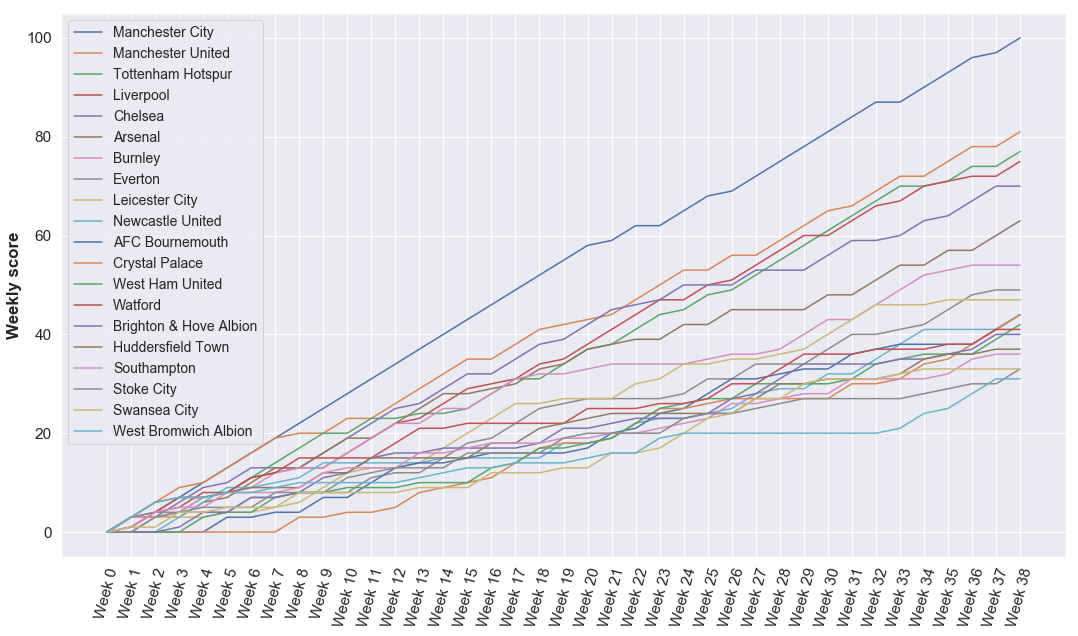

In [104]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

#### Finding the longest winning and losing streak:

##### Finding the longest winning streak:

##### To calculate the longest winning streak, we use the data set 'Points_table' to obtain the longest winning streak. The 'points_table' dataset has been declared previously in this analysis. If you see the dataset, the column gameweek is defined weekly, i.e. it shows the entire outcomes of the first week and move to the second week and so on. Here we just reconstruct the data and represent it team wise.

In [105]:
rest={}
for i in points_table.team.unique():
    t = list(points_table.where(points_table.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max
    


In [106]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

,teams,winning_streak
10,Manchester City,18
16,Tottenham Hotspur,7
4,Chelsea,4
8,Leicester City,4
9,Liverpool,4
11,Manchester United,4
12,Newcastle United,3
3,Burnley,3
1,Arsenal,3
18,West Bromwich Albion,2


##### Finding the longest losing streak:

##### To calculate the longest losing streak, we use the data set 'Points_table' to obtain the longest winning streak. The 'points_table' dataset has been declared previously in this analysis. If you see the dataset, the column gameweek is defined weekly, i.e. it shows the entire outcomes of the first week and move to the second week and so on. Here we just reconstruct the data and represent it team wise.

In [107]:
result={}
for i in points_table.team.unique():
    t = list(points_table.where(points_table.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [108]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

,teams,losing_streak
18,West Bromwich Albion,8
5,Crystal Palace,7
7,Huddersfield Town,5
0,AFC Bournemouth,4
17,Watford,4
15,Swansea City,4
14,Stoke City,4
12,Newcastle United,4
1,Arsenal,3
13,Southampton,3


### From the data and the plot we can see that the team which has the longest winning streak is Manchester city. Manchester city made a winning chain of 18 matches. On the other hand, the  team with highest losing streak is West Bromwich Albion.

# RQ 2

### We want to verify the common belief that playing home or away influences the result of a match for a team.

In [24]:
team=pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\teams.json")
team=team[:98]
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)
#Changing the officialName column's encoding, so that names are displayed correctly
a = []
for i in range(len(team.officialName)):
    a.append(team.officialName[i].encode('ascii').decode('unicode escape'))
team.officialName = a
team = team.drop(['city','name', 'type', 'alpha2code', 'alpha3code'], axis = 1)
team.head()

,officialName,wyId,id
0,Newcastle United FC,1613,0
1,Real Club Celta de Vigo,692,724
2,Reial Club Deportiu Espanyol,691,724
3,Deportivo Alavés,696,724
4,Levante UD,695,724


In [17]:
Matches = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\matches\matches_England.json")

Premier League Teams can be retrieved from the teams dataset with the value 'id' = 0

In [27]:
PLteams = pd.DataFrame(team[team.id == '0'])
teams = pd.DataFrame({'Name' : list(PLteams.officialName), 'ID' : list(PLteams['wyId'])})
team_data = Matches.teamsData
teams.head()

,Name,ID
0,Newcastle United FC,1613
1,Huddersfield Town FC,1673
2,Swansea City AFC,10531
3,AFC Bournemouth,1659
4,Brighton & Hove Albion FC,1651


#### I've chosen to take the two top ranking teams, Manchester City and Manchester Utd., two mid-ranking, Newcastle Utd. and Leicester City and the bottom ranking team of the season, West Bromwich.

In [6]:
team5 = ['1625', '1611', '1613', '1631', '1627']
print(*[teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5], sep = '\n')

Manchester City FC
Manchester United FC
Newcastle United FC
Leicester City FC
West Bromwich Albion FC


In [7]:
# Defining a function to display the contingeny tables on the same line with html format
from IPython.display import display_html
def mydisplay(dfs, names=[]):
    html_str = ''
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center"><strong><em>{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:center"> {df.to_html(index=True)}</td>' 
                         for df in dfs) +
                 '</tr>') 
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)
    

frames = []
for t in team5:   
    a = []
    
    for i in range(len(Matches)):
         if t in list(Matches['teamsData'][i].keys()) :
                
            if str(Matches.winner[i]) == t:
                a.append([team_data[i][t]['side'], 'win'])
                
            elif str(Matches.winner[i]) == '0':
                a.append([team_data[i][t]['side'], 'draw'])
                
            else:
                a.append([team_data[i][t]['side'], 'lose'])
                
    frame = pd.DataFrame(a, columns = ['side', 'result']) 
    
    frames.append(pd.crosstab(frame.side, frame.result))
    
mydisplay(frames, names= [teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5])

Manchester City FC Manchester United FC Newcastle United FC Leicester City FC West Bromwich Albion FC 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 2 
 1 
 16 
 
 
 home 
 2 
 1 
 16 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 5 
 10 
 
 
 home 
 2 
 2 
 15 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 11 
 4 
 
 
 home 
 4 
 7 
 8 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 5 
 9 
 5 
 
 
 home 
 6 
 6 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 12 
 3 
 
 
 home 
 9 
 7 
 3

In [8]:
frames = []
Total = []
for t in team5:   
    a = []
    othteam = set(team5)
    othteam.remove(t)
    for i in range(len(Matches)):
         if t in list(Matches['teamsData'][i].keys()) and len(othteam.intersection(set(Matches['teamsData'][i].keys()))) == 0:
            if str(Matches.winner[i]) == t:
                a.append([team_data[i][t]['side'], 'win'])
                Total.append([team_data[i][t]['side'], 'win'])
            elif str(Matches.winner[i]) == '0':
                a.append([team_data[i][t]['side'], 'draw'])
                Total.append([team_data[i][t]['side'], 'draw'])
            else:
                a.append([team_data[i][t]['side'], 'lose'])
                Total.append([team_data[i][t]['side'], 'lose'])
    
    frame = pd.DataFrame(a, columns = ['side', 'result']) 
    frames.append(pd.crosstab(frame.side, frame.result))
mydisplay(frames, names= [teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5])


Manchester City FC Manchester United FC Newcastle United FC Leicester City FC West Bromwich Albion FC 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 2 
 1 
 12 
 
 
 home 
 2 
 0 
 13 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 4 
 8 
 
 
 home 
 2 
 0 
 13 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 9 
 3 
 
 
 home 
 4 
 4 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 5 
 7 
 3 
 
 
 home 
 4 
 4 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 11 
 1 
 
 
 home 
 8 
 4 
 3

In [9]:
Tot = pd.DataFrame(Total, columns=['side', 'result'])
cont_tab = pd.crosstab(Tot.side, Tot.result, margins= True)
cont_tab

result,draw,lose,win,All
side,,,,
away,16,32,27,75
home,20,12,43,75
All,36,44,70,150


## Chi-Squared Test

### A chi-squared test with significance level $\alpha = 0.05$ will now be performed on the contingency table $Side$ x $Result$

#### H0 : The null Hypothesis is that there's no statistically significant relationship between the side on which a team plays and the result of the match

#### H1: The alternative hypotesis is that there's significant relationship between the side of a team and its result in a match

Appending all observed frequencies to a single vector

In [10]:
f_obs = np.append(cont_tab.iloc[0][0:3].values, cont_tab.iloc[1][0:3].values)
f_obs

array([16, 32, 27, 20, 12, 43], dtype=int64)

Getting the marginal frequencies for rows (Side)

In [11]:
row_sums = cont_tab.iloc[0:2,3].values
row_sums

array([75, 75], dtype=int64)

Marginal frequencies for columns (Result)

In [12]:
col_sums = cont_tab.iloc[2,0:3].values
col_sums

array([36, 44, 70], dtype=int64)

Expected frequencies under Indipendence Hypothesis

In [13]:
total = cont_tab.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

[18.0, 22.0, 35.0, 18.0, 22.0, 35.0]

$\chi^2$ statistic

In [14]:
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

Chi-squared Statistic: 13.192496392496395


In [15]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof))

Degrees of Freedom: 2


In [16]:

percentile = ss.chi2.ppf(0.95, 2)
print('Chi-squared Statistic: {}'.format(round(chi_squared_statistic, 2)),
      '\n95th Percentile of Chi-squared distribution: {}'.format(round(percentile, 2)))

Chi-squared Statistic: 13.19 
95th Percentile of Chi-squared distribution: 5.99


#### Since the Chi-squared statistic obtained from our calculation is bigger than the 95th percentile of the $\chi^2_2$, we can conlude that the null hypotesis must be rejected. There is a relationship between the side on which a team plays and its result in a match, and we can infer, by looking at the following barplot, that playing home influences positively a team's chances of winning a match (likewise, playing away increases chances of losing).

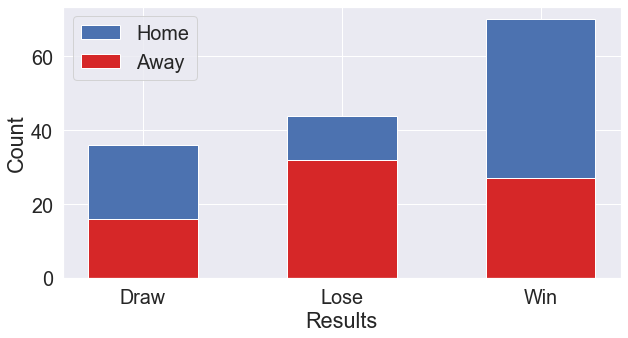

In [17]:

#Assigns the frequency values
awaycount = cont_tab.iloc[0][0:3].values
homecount = cont_tab.iloc[1][0:3].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
results = ["Draw","Lose","Win"]
p1 = plt.bar(results, awaycount, 0.55, color='#d62728')
p2 = plt.bar(results, homecount, 0.55, bottom=awaycount)
plt.legend((p2[0], p1[0]), ('Home','Away'))
plt.xlabel('Results')
plt.ylabel('Count')
plt.show()

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import scipy.stats as ss
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [15]:
#Import the data: Teams
team=pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\teams.json")
pd.set_option('display.max_rows', 142)
pd.set_option('display.max_columns', 12)
#From index 98, the type is given as Nation. So we don't need that.
team=team[:98]
#convert the area from a series to a list
#Convert the list into a dataframe and concatenate the dataframe to the parent data i.e. team.
#Drop the column 'area'
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)
#Changing the officialName column's encoding, so that names are displayed correctly
a = []
for i in range(len(team.officialName)):
    a.append(team.officialName[i].encode('ascii').decode('unicode escape'))
team.officialName = a
team = team.drop(['city','name', 'type', 'alpha2code', 'alpha3code'], axis = 1)
team.head()

,officialName,wyId,id
0,Newcastle United FC,1613,0
1,Real Club Celta de Vigo,692,724
2,Reial Club Deportiu Espanyol,691,724
3,Deportivo Alavés,696,724
4,Levante UD,695,724


# RQ 2 - Bonus 

### Validation of the $Side*Result$ dependency found for Premier League teams with two other countries' leagues.

We want to evaluate the genrality of the dependecy between the side and the result of a match. We will try to demonstrate that the "home/away" rule is still valid over other leagues (or maybe it isn't), by executing the same type of analysis, i.e. taking 5 teams in the same way we have chosen the ones from Premier League, and elaborating a $\chi^2$ test of independence over the contingenty tables $Side$ x $Result$. 

In [11]:
eng_matches = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\matches\matches_England.json")
ita_matches = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\matches\matches_Italy.json")
spa_matches = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\matches\matches_Spain.json")

Premier League Teams can be retrieved from the dataframe team with the value 'id' = 0, Serie A teams with the 'id' = 380 and Liga teams wtih 'id' = 724. 

In [22]:
PLteams = pd.DataFrame(team[team.id == '0'])
pl_teams = pd.DataFrame({'Name' : list(PLteams.officialName), 'ID' : list(PLteams['wyId'])})
pl_team_data = eng_matches.teamsData

Ligateams = pd.DataFrame(team[team.id == '724'])
liga_teams = pd.DataFrame({'Name' : list(Ligateams.officialName), 'ID' : list(Ligateams['wyId'])})
liga_team_data = spa_matches.teamsData

Ateams = pd.DataFrame(team[team.id == '380'])
a_teams = pd.DataFrame({'Name' : list(Ateams.officialName), 'ID' : list(Ateams['wyId'])})
a_team_data = ita_matches.teamsData

#### I've chosen to take the two top ranking teams, Manchester City and Manchester Utd., two mid-ranking, Newcastle Utd. and Leicester City and the bottom ranking team of the season, West Bromwich.

In [24]:
pl_team5 = ['1625', '1611', '1613', '1631', '1627']
print(*[pl_teams[pl_teams['ID'] == int(t)].Name.iloc[0] for t in pl_team5], sep = '\n')

Manchester City FC
Manchester United FC
Newcastle United FC
Leicester City FC
West Bromwich Albion FC


#### Following the same pattern for Serie A, we take the first two teams, Juventus and Napoli, two mid-ranking teams, Sampdoria and Sassuolo, and the bottom ranking team, Benevento.

In [26]:
a_team5 = ['3159', '3187', '3164', '3315', '3219']
print(*[a_teams[a_teams['ID'] == int(t)].Name.iloc[0] for t in a_team5], sep = '\n')

Juventus FC
SSC Napoli
UC Sampdoria
US Sassuolo Calcio
Benevento Calcio


#### Same for La Liga

In [28]:
liga_team5 = ['676', '679', '756', '691', '683']
print(*[liga_teams[liga_teams['ID'] == int(t)].Name.iloc[0] for t in liga_team5], sep = '\n')

FC Barcelona
Club Atlético de Madrid
Girona FC
Reial Club Deportiu Espanyol
Málaga Club de Fútbol


In [29]:
# Defining a function to display the contingeny tables on the same line with html format
from IPython.display import display_html
def mydisplay(dfs, names=[]):
    html_str = ''
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center"><strong><em>{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:center"> {df.to_html(index=True)}</td>' 
                         for df in dfs) +
                 '</tr>') 
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)

For each team in the 5 teams we have chosen, we gather data about results and side, and represent them in contingency tables. The matchess between a team and the other teams of the five we have chosen will be dropped, because they would influence the chi-squared test of independence (since the result and side of one team is certainly dependent with the result and side of the opponent). This will be repeated for the other two leagues in the exact same way.

In [38]:
team5 = pl_team5
Matches = eng_matches
teams =  pl_teams
team_data = pl_team_data
frames = []
Total = []
for t in team5:   
    a = []
    othteam = set(team5)
    othteam.remove(t)
    for i in range(len(Matches)):
         if t in list(Matches['teamsData'][i].keys()) and len(othteam.intersection(set(Matches['teamsData'][i].keys()))) == 0:
            if str(Matches.winner[i]) == t:
                a.append([team_data[i][t]['side'], 'win'])
                Total.append([team_data[i][t]['side'], 'win'])
            elif str(Matches.winner[i]) == '0':
                a.append([team_data[i][t]['side'], 'draw'])
                Total.append([team_data[i][t]['side'], 'draw'])
            else:
                a.append([team_data[i][t]['side'], 'lose'])
                Total.append([team_data[i][t]['side'], 'lose'])
    
    frame = pd.DataFrame(a, columns = ['side', 'result']) 
    frames.append(pd.crosstab(frame.side, frame.result))
mydisplay(frames, names= [teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5])
pl_tot = Total

Manchester City FC Manchester United FC Newcastle United FC Leicester City FC West Bromwich Albion FC 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 2 
 1 
 12 
 
 
 home 
 2 
 0 
 13 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 4 
 8 
 
 
 home 
 2 
 0 
 13 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 9 
 3 
 
 
 home 
 4 
 4 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 5 
 7 
 3 
 
 
 home 
 4 
 4 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 11 
 1 
 
 
 home 
 8 
 4 
 3

In [39]:
team5 = liga_team5
Matches = spa_matches
teams =  liga_teams
team_data = liga_team_data
frames = []
Total = []
for t in team5:   
    a = []
    othteam = set(team5)
    othteam.remove(t)
    for i in range(len(Matches)):
         if t in list(Matches['teamsData'][i].keys()) and len(othteam.intersection(set(Matches['teamsData'][i].keys()))) == 0:
            if str(Matches.winner[i]) == t:
                a.append([team_data[i][t]['side'], 'win'])
                Total.append([team_data[i][t]['side'], 'win'])
            elif str(Matches.winner[i]) == '0':
                a.append([team_data[i][t]['side'], 'draw'])
                Total.append([team_data[i][t]['side'], 'draw'])
            else:
                a.append([team_data[i][t]['side'], 'lose'])
                Total.append([team_data[i][t]['side'], 'lose'])
    
    frame = pd.DataFrame(a, columns = ['side', 'result']) 
    frames.append(pd.crosstab(frame.side, frame.result))
mydisplay(frames, names= [teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5])
liga_tot = Total

FC Barcelona Club Atlético de Madrid Girona FC Reial Club Deportiu Espanyol Málaga Club de Fútbol 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 1 
 10 
 
 
 home 
 3 
 0 
 12 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 2 
 10 
 
 
 home 
 4 
 0 
 11 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 6 
 5 
 
 
 home 
 2 
 6 
 7 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 8 
 6 
 1 
 
 
 home 
 5 
 4 
 6 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 2 
 12 
 1 
 
 
 home 
 2 
 9 
 4

In [40]:
team5 = a_team5
Matches = ita_matches
teams =  a_teams
team_data = a_team_data
frames = []
Total = []
for t in team5:   
    a = []
    othteam = set(team5)
    othteam.remove(t)
    for i in range(len(Matches)):
         if t in list(Matches['teamsData'][i].keys()) and len(othteam.intersection(set(Matches['teamsData'][i].keys()))) == 0:
            if str(Matches.winner[i]) == t:
                a.append([team_data[i][t]['side'], 'win'])
                Total.append([team_data[i][t]['side'], 'win'])
            elif str(Matches.winner[i]) == '0':
                a.append([team_data[i][t]['side'], 'draw'])
                Total.append([team_data[i][t]['side'], 'draw'])
            else:
                a.append([team_data[i][t]['side'], 'lose'])
                Total.append([team_data[i][t]['side'], 'lose'])
    
    frame = pd.DataFrame(a, columns = ['side', 'result']) 
    frames.append(pd.crosstab(frame.side, frame.result))
mydisplay(frames, names= [teams[teams['ID'] == int(t)].Name.iloc[0] for t in team5])
a_tot = Total

Juventus FC SSC Napoli UC Sampdoria US Sassuolo Calcio Benevento Calcio 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 4 
 0 
 11 
 
 
 home 
 1 
 1 
 13 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 1 
 11 
 
 
 home 
 3 
 1 
 11 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 8 
 4 
 
 
 home 
 3 
 2 
 10 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 3 
 7 
 5 
 
 
 home 
 5 
 7 
 3 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 0 
 14 
 1 
 
 
 home 
 2 
 9 
 4

In this contingency tables showed for each league, there can be already sensed some kind of relationship between the side and results of a team, although in Serie A this relationship looks a bit weak. In fact, Juve and Napoli had basically same results while playing home or away, and Sassuolo had even better results when playing away than playing home. Only Sampdoria and Benevento's results look influenced by the side. Since the purpose of this analysis is to verify if the "home/away" rule that was valid in Premier League is valid as a general rule, we should get this first outlook as an hint that Serie A is a very different league from Premier league (in fact, every league is different), so the same rule might not apply. We will test this suspicion through a repetition and a final comparison of the Chi-squared test for each league, and to do so we must build the total contingency tables for each country's first division.

In [71]:
tables = []
for Total in [pl_tot, liga_tot, a_tot]:
    Tot = pd.DataFrame(Total, columns=['side', 'result'])
    cont_tab = pd.crosstab(Tot.side, Tot.result, margins= False)
    tables.append(cont_tab)
mydisplay(tables, names= ['Premier League', 'La Liga', 'Serie A'])

Premier League La Liga Serie A 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 16 
 32 
 27 
 
 
 home 
 20 
 12 
 43 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 21 
 27 
 27 
 
 
 home 
 16 
 19 
 40 
 
 
 
 
 
 result 
 draw 
 lose 
 win 
 
 
 side 
 
 
 
 
 
 
 
 away 
 13 
 30 
 32 
 
 
 home 
 14 
 20 
 41

## Chi-Squared Test

### A chi-squared test with significance level $\alpha = 0.05$ will now be performed on the contingency tables $Side$ x $Result$ for each country's first division

#### H0 : The null Hypothesis is that there's no statistically significant relationship between the side on which a team plays and the result of the match

#### H1: The alternative hypotesis is that there's significant relationship between the side of a team and its result in a match

In [115]:
i = 0
for table in tables:
    names= ['Premier League', 'La Liga', 'Serie A']
    print('----- ',names[i], '\n')
    stat, p, dof, expected = chi2_contingency(table)
    print('dof=%d \n' % dof)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, \ncritical=%.3f, stat=%.3f\n' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    print('\n')
    i += 1

-----  Premier League 

dof=2 

probability=0.950, 
critical=5.991, stat=13.192

Dependent (reject H0)
significance=0.050, p=0.001


-----  La Liga 

dof=2 

probability=0.950, 
critical=5.991, stat=4.589

Independent (fail to reject H0)
significance=0.050, p=0.101


-----  Serie A 

dof=2 

probability=0.950, 
critical=5.991, stat=3.147

Independent (fail to reject H0)
significance=0.050, p=0.207




### As the above results show, our suspicion was well-founded. Both Serie A and Liga's teams gave independence as result of the chi-squared test over their contingency tables $Side$ x $Result$. This means that for those teams, there's no significant relationship between the side on which a team plays and his result in a match. So we have two counter-examples to the rule we found confirmed by the teams we had chosen in Premier League. This doesn't give us any certainty, but only tells us that the "home/away" rule is not always valid for all countries' leagues (and for each season, since of course team's results may vary over the years), and is not as general as intuition or tradition may suggest.

We will show the barplots for each country's first division, to visualize the relationship we have found in Premier League, and the independence between side and result for Liga and Serie A.

In [135]:
tables[0].keys()

Index(['draw', 'lose', 'win'], dtype='object', name='result')

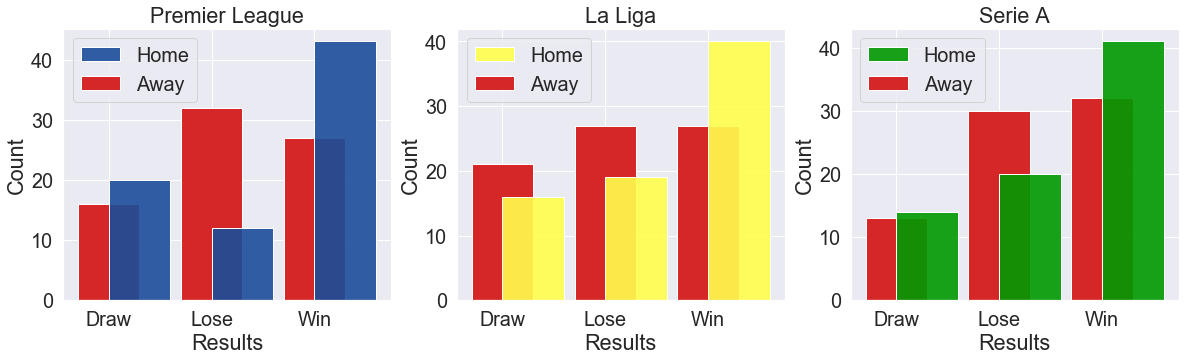

In [162]:
#Premier League

awaycount = tables[0].iloc[0][0:3].values
homecount = tables[0].iloc[1][0:3].values

fig = plt.figure(figsize=(20, 5))
ax=fig.add_subplot(1,3,1)
sns.set(font_scale=1.8)
results = ["Draw","Lose","Win"]
p1 = plt.bar(results, awaycount, 0.6, color='#d62728')
p2 = plt.bar(results, homecount, 0.6, align = 'edge', color = (0.1,0.3,0.6,0.9))
plt.legend((p2[0], p1[0]), ('Home','Away'))
plt.xlabel('Results')
plt.ylabel('Count')
plt.title('Premier League')

#La Liga

awaycount = tables[1].iloc[0][0:3].values
homecount = tables[1].iloc[1][0:3].values

ax=fig.add_subplot(1,3,2)
results = ["Draw","Lose","Win"]
p1 = plt.bar(results, awaycount, 0.6, color='#d62728')
p2 = plt.bar(results, homecount, 0.6, align='edge', color = (1,1,0.3,0.9))
plt.legend((p2[0], p1[0]), ('Home','Away'))
plt.xlabel('Results')
plt.ylabel('Count')
plt.title('La Liga')

#Serie A

awaycount = tables[2].iloc[0][0:3].values
homecount = tables[2].iloc[1][0:3].values

ax=fig.add_subplot(1,3,3)
results = ["Draw","Lose","Win"]
p1 = plt.bar(results, awaycount, 0.6, color='#d62728')
p2 = plt.bar(results, homecount, 0.6, align = 'edge', color = (0,0.6,0,0.9))
plt.legend((p2[0], p1[0]), ('Home','Away'))
plt.xlabel('Results')
plt.ylabel('Count')
plt.title('Serie A')
plt.show()

### The plots show what we anticipated: The results depend clearly from the side for Premier league teams, as the difference between home and away results are pronounced, while in the barplots for Serie A and Liga these diifferences still exist, but are less marked.  There's no evidence that the same $Side*Results$ relationship exists in these leagues (relying on the data that were used to run the analysis).

# RQ 3

Since we want to find the 10 teams who had the youngest coaches during the whole season, we need to check all of the mathces to see if any team had more than one coach during the season. If that is the case, we will keep only the youngest

#### This information can be found in the teamsData column of Matches dataframe, with the coachId entry

In [3]:
team=pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\teams.json")
team=team[:98]
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)
#Changing the officialName column's encoding, so that names are displayed correctly
a = []
for i in range(len(team.officialName)):
    a.append(team.officialName[i].encode('ascii').decode('unicode escape'))
team.officialName = a
team = team.drop(['city','name', 'type', 'alpha2code', 'alpha3code'], axis = 1)
team.head()

,officialName,wyId,id
0,Newcastle United FC,1613,0
1,Real Club Celta de Vigo,692,724
2,Reial Club Deportiu Espanyol,691,724
3,Deportivo Alavés,696,724
4,Levante UD,695,724


In [24]:
Matches = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\matches\matches_England.json")
PLteams = pd.DataFrame(team[team.id == '0'])
teams = pd.DataFrame({'Name' : list(PLteams.officialName), 'ID' : list(PLteams['wyId'])})
team_data = Matches.teamsData
teams.set_index('ID', inplace = True)

In [27]:
d = dict()
for t in teams.index:
        d[str(t)] = set()
for i in range(len(Matches)):
    data = pd.DataFrame({'Coach': pd.DataFrame(team_data[i].values())['coachId'], 
                         'Team' : pd.DataFrame(team_data[i].values())['teamId']})
    for t in data.Team:
    #in some matches the coachId is '0', meaning that there's no information, and these values should be removed
        if int(data.Coach[data.Team == t]) != 0:
            d[str(t)].add(int(data.Coach[data.Team == t])) 

#### Just a basic visualization of coach changes for all teams

Making all rows of the same length to avoid creation of NaN values in the dataframe, for a better visualization

In [28]:
dnew = d.copy()
for i in dnew.keys():
    dnew[i] = list(dnew[i])
    if len(dnew[i]) < 3:
        for _ in range(3-len(dnew[i])):
            dnew[i].append('-')
a = teams.join(pd.DataFrame(dnew.values(), index=map(int, d.keys())))
a

,Name,0,1,2
ID,,,,
1613,Newcastle United FC,531745,210700,-
1673,Huddersfield Town FC,18572,-,-
10531,Swansea City AFC,381291,32573,-
1659,AFC Bournemouth,8934,-,-
1651,Brighton & Hove Albion FC,8093,-,-
1646,Burnley FC,8880,-,-
1631,Leicester City FC,209010,333782,8214
1633,West Ham United FC,8235,269869,-
1639,Stoke City FC,8329,9054,-


### Now the coaches database must be imported, to match the IDs of Premier league coaches in the dictionary with their corresponding birth dates contained in the database

In [29]:
coaches = pd.read_json(r'C:\Users\simon\Desktop\ADM\ADM Homework 2\coaches.json').drop(['firstName', 'lastName', 'middleName', 'passportArea', 'birthArea'], axis = 1)

#### There's a problem with one of the coaches wyId. It came out that 3782 is not a valid coach ID. In fact, by checking the team to which this ID is associated, Tottenham FC, we can be sure that there should be only one coach wyID (292863), the one associated with Mauricio Pochettino, the only manager of Tottenham since 2014.

In [30]:
coaches[coaches.wyId == 3782]

,birthDate,currentTeamId,shortName,wyId


In [31]:
coaches[coaches.wyId == 292863]

,birthDate,currentTeamId,shortName,wyId
90,1972-03-02,1624,M. Pochettino,292863


#### Changing the dictionary entry of Tottenham FC

In [32]:
d['1624'] = {292863}

In [33]:
for i in d.keys():
    bd = []
    for v in d[i]:
        bd.append(coaches.birthDate[coaches.wyId == v].iloc[0])
    bd.sort()
    print(bd)


['1960-04-16', '1973-02-19']
['1971-10-19']
['1965-12-04', '1972-01-08']
['1977-11-29']
['1958-12-11']
['1971-06-28']
['1961-09-02', '1963-10-26', '1975-12-04']
['1963-04-25', '1968-09-11']
['1963-11-01', '1969-08-07']
['1970-05-01', '1977-07-12']
['1954-10-19', '1963-03-21', '1973-10-16']
['1958-01-16', '1959-05-02', '1961-07-18']
['1971-01-18']
['1972-03-02']
['1947-08-09', '1970-05-15']
['1963-11-01', '1971-10-05']
['1967-06-16']
['1969-07-31', '1969-07-31']
['1963-01-26']
['1949-10-22']


#### It also came out that Chelsea FC has two coach wyIDs associated to the same manager, Antonio Conte, hence the list with the same date repeated twice. This wouldn't affect our analysis since the two entries in the coaches database are identical, but one of the two wyIDs will be removed to avoid redundancy.

In [34]:
coaches[coaches.wyId == 272869]

,birthDate,currentTeamId,shortName,wyId
198,1969-07-31,0,A. Conte,272869


In [35]:
coaches[coaches.wyId == 20454]

,birthDate,currentTeamId,shortName,wyId
8,1969-07-31,0,A. Conte,20454


In [36]:
d['1610'].remove(20454)

#### We can now assign the highest value of the sorted bd (birth date) list to each team's entry in the dictionary, so that we only keep the youngest coach for every team.

In [37]:
dnew = dict()
for i in d.keys():
    bd = []
    for v in d[i]:
        bd.append(coaches.birthDate[coaches.wyId == v].iloc[0])
    bd.sort()
    dnew[i] = bd[-1]
dnew  

{'1613': '1973-02-19',
 '1673': '1971-10-19',
 '10531': '1972-01-08',
 '1659': '1977-11-29',
 '1651': '1958-12-11',
 '1646': '1971-06-28',
 '1631': '1975-12-04',
 '1633': '1968-09-11',
 '1639': '1969-08-07',
 '1644': '1977-07-12',
 '1623': '1973-10-16',
 '1627': '1961-07-18',
 '1625': '1971-01-18',
 '1624': '1972-03-02',
 '1628': '1970-05-15',
 '1619': '1971-10-05',
 '1612': '1967-06-16',
 '1610': '1969-07-31',
 '1611': '1963-01-26',
 '1609': '1949-10-22'}

In [38]:
ordered_DF = pd.DataFrame({'teamID' : list(dnew.keys()), 'Team_Name' : list(teams['Name']),
              'Coach_Birthday' : list(dnew.values())}).sort_values(by = 'Coach_Birthday', ascending=False)

In [39]:
ordered_DF.reset_index(drop = True, inplace=True)

### The top 10 teams with the youngest coaches feature in the following table

In [40]:
ordered_DF[0:10]

,teamID,Team_Name,Coach_Birthday
0,1659,AFC Bournemouth,1977-11-29
1,1644,Watford FC,1977-07-12
2,1631,Leicester City FC,1975-12-04
3,1623,Everton FC,1973-10-16
4,1613,Newcastle United FC,1973-02-19
5,1624,Tottenham Hotspur FC,1972-03-02
6,10531,Swansea City AFC,1972-01-08
7,1673,Huddersfield Town FC,1971-10-19
8,1619,Southampton FC,1971-10-05
9,1646,Burnley FC,1971-06-28


### Now we want to visualize the distribution of coach ages for the Premier League teams of the 2017/2018 season through a boxplot.

In [41]:
allcoachesPL = []
for v in d.values():
    allcoachesPL += list(v)
    

In [42]:
alldates = []
for c in allcoachesPL:
    alldates.append(coaches.birthDate[coaches.wyId == c].iloc[0])    

#### To get the ages of the PL coaches, 2017-12-31 is taken as reference, because it falls in the middle of the 2017/2018 season and makes calculation easier.

In [43]:
ages = [2017 - int(i[0:4]) for i in alldates]


## Boxplot of the coach ages distribution

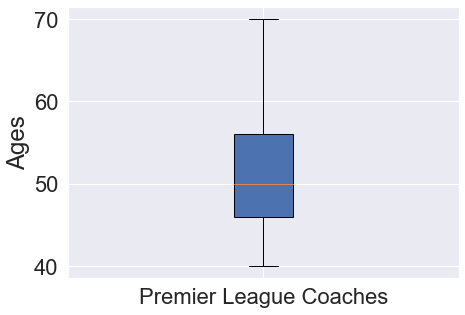

In [46]:
fig = plt.figure(figsize=(7, 5))
sns.set(font_scale=2)
plt.boxplot(ages, labels = ['Premier League Coaches'], patch_artist=True)
plt.ylabel('Ages')
plt.show()
plt.close()

# [RQ4]

In [14]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Research Question: Find the top 10 players with the highest ratio between completed passes and attempted passes.

#### Import the players dataset

In [15]:
players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


#### Import the event data for England

In [16]:
events=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_England.json")
pd.set_option('display.max_columns', 15)
events.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


#### As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes. 

In [17]:
events['eventName']=events['eventName'].astype(str)
events=events[(events.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)

#### Splitting the column 'Tags' that is a dictionary

In [18]:
TAG1=[]
for i in range(len(events.tags)):
    try:
        TAG1.append(str(events.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events.tags)):
    try:
        TAG2.append(str(events.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events.tags)):
    try:
        TAG3.append(str(events.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events.tags)):
    try:
        TAG4.append(str(events.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events=[events,TAG]
events=pd.concat(mix_events,  axis=1,  sort=False).reindex(events.index)
events=events.drop('tags',axis=1)

#### Counting the number of passes with respect to the player id

In [19]:
passes=events
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player['Numberofpasses'] = passes_player.groupby('PlayerId')['PlayerId'].transform('count')
passes_player

,PlayerId,Numberofpasses
0,25413.0,657
1,370224.0,574
2,3319.0,1790
3,120339.0,834
4,167145.0,1877
...,...,...
328652,8313.0,1203
328653,379209.0,549
328654,8561.0,1245
328655,20620.0,725


#### In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [22]:
#calculating mean and standard deviation
Mean=passes_player.Numberofpasses.mean()
stdv=passes_player.Numberofpasses.std()
Mean=int(Mean)
stdv=int(stdv)
#calculating lower bound
lower_bound=Mean-(stdv*1.5)
ID_passes_threshold=[]
frequency_passes_threshold=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player.Numberofpasses)):
    frequency_passes.append(float(passes_player.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold.append(int(frequency_passes[i]))
        ID_passes_threshold.append(int(ID_passes[i]))


In [169]:
lower_bound

102.71506385279235

In [23]:
passes_threshold=pd.DataFrame(ID_passes_threshold, columns=['PlayerId'])
passes_threshold.insert(1, "Numberofpasses",frequency_passes_threshold, True)
passes_threshold.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold

,PlayerId,Numberofpasses
0,25413,657
1,370224,574
2,3319,1790
3,120339,834
4,167145,1877
...,...,...
207630,134502,779
209926,207164,334
210627,25867,303
221491,104851,195


In [24]:
events_tag2=events.loc[events['Tag2'] == '1801']
events_tag1=events.loc[events['Tag1']=='1801']
events_tag3=events.loc[events['Tag3']=='1801']
events_tag4=events.loc[events['Tag4']=='1801']
events_tag=[events_tag1,events_tag2,events_tag3,events_tag4]
success=pd.concat(events_tag, axis=0)
success.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,25413.0,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719.0,Pass,1609.0,1H,2.758649,85,177959171.0,1801,Notag,Notag,Notag
1,8.0,High pass,370224.0,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719.0,Pass,1609.0,1H,4.946850,83,177959172.0,1801,Notag,Notag,Notag
2,8.0,Head pass,3319.0,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719.0,Pass,1609.0,1H,6.542188,82,177959173.0,1801,Notag,Notag,Notag
3,8.0,Head pass,120339.0,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719.0,Pass,1609.0,1H,8.143395,82,177959174.0,1801,Notag,Notag,Notag
4,8.0,Simple pass,167145.0,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719.0,Pass,1609.0,1H,10.302366,85,177959175.0,1801,Notag,Notag,Notag


In [25]:
SUCCESS=[]
for i in range(len(success.playerId)):
    SUCCESS.append(success.playerId.iloc[i])
success_new=pd.DataFrame(SUCCESS , columns=['PlayerId'])
success_new['Numberofpasses'] = success_new.groupby('PlayerId')['PlayerId'].transform('count')
success_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_new

,PlayerId,Numberofpasses
0,25413.0,298
1,370224.0,185
2,3319.0,1012
3,120339.0,205
4,167145.0,937
...,...,...
124506,281135.0,31
124769,274488.0,17
126226,25604.0,17
127966,171283.0,48


In [26]:
final_passes=pd.merge(success_new, passes_threshold, on='PlayerId')
final_passes=final_passes.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes

,PlayerId,AccuratePassesNumber,TotalPassesNumber
0,25413.0,298,657
1,370224.0,185,574
2,3319.0,1012,1790
3,120339.0,205,834
4,167145.0,937,1877
...,...,...,...
352,8135.0,42,487
353,397174.0,44,337
354,61961.0,24,223
355,7961.0,31,251


In [27]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
engteams = teams[(teams["alpha3code"]=="XEN") & (teams["type"]=="club") | (teams["teamname"]=="Swansea City")]
engplayer = players.merge(engteams, left_on="currentTeamId", right_on="wyId")
engplayer=engplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

engplayer=engplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
engplayer=engplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes=pd.merge(engplayer, final_passes, on='PlayerId')
final_player_passes

,birthDate,PlayerId,shortName,officialName,AccuratePassesNumber,TotalPassesNumber
0,1989-03-02,36,T. Alderweireld,Tottenham Hotspur FC,598,898
1,1987-04-24,48,J. Vertonghen,Tottenham Hotspur FC,1129,2370
2,1992-02-14,54,C. Eriksen,Tottenham Hotspur FC,869,2196
3,1990-07-02,8292,D. Rose,Tottenham Hotspur FC,142,392
4,1993-07-28,8717,H. Kane,Tottenham Hotspur FC,246,594
...,...,...,...,...,...,...
312,1990-08-12,189821,M. Zeegelaar,Watford FC,154,436
313,1989-08-12,7929,T. Cleverley,Watford FC,830,1081
314,1991-06-26,10663,A. Gray,Watford FC,143,271
315,1993-01-01,28292,A. Doucour\u00e9,Watford FC,1010,2178


In [28]:
Efficiency=[]
for i in range(len(final_player_passes.AccuratePassesNumber)):
    total=final_player_passes.TotalPassesNumber.iloc[i]
    accurate=final_player_passes.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency.append(Ratio)
Efficiency=pd.DataFrame(Efficiency)

In [29]:
final_player_passes.insert(4,'Efficiency',Efficiency)
final_player_ratio=final_player_passes
final_player_ratio

,birthDate,PlayerId,shortName,officialName,Efficiency,AccuratePassesNumber,TotalPassesNumber
0,1989-03-02,36,T. Alderweireld,Tottenham Hotspur FC,0.665924,598,898
1,1987-04-24,48,J. Vertonghen,Tottenham Hotspur FC,0.476371,1129,2370
2,1992-02-14,54,C. Eriksen,Tottenham Hotspur FC,0.395719,869,2196
3,1990-07-02,8292,D. Rose,Tottenham Hotspur FC,0.362245,142,392
4,1993-07-28,8717,H. Kane,Tottenham Hotspur FC,0.414141,246,594
...,...,...,...,...,...,...,...
312,1990-08-12,189821,M. Zeegelaar,Watford FC,0.353211,154,436
313,1989-08-12,7929,T. Cleverley,Watford FC,0.767808,830,1081
314,1991-06-26,10663,A. Gray,Watford FC,0.527675,143,271
315,1993-01-01,28292,A. Doucour\u00e9,Watford FC,0.463728,1010,2178


In [30]:
final_player_ratio.to_json(r'C:\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw2\final_player_ratio.json')

In [31]:
bestefficiency=final_player_ratio.nlargest(10, ['Efficiency']) 
bestefficiency=bestefficiency.reset_index()
bestefficiency=bestefficiency.drop(columns=['index','PlayerId'])
bestefficiency=bestefficiency.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,birthDate,shortName,officialName,Efficiency,AccuratePassesNumber,TotalPassesNumber
0,1996-02-02,H. Winks,Tottenham Hotspur FC,0.904459,568,628
1,1986-06-26,J. Puncheon,Crystal Palace FC,0.877193,200,228
2,1987-02-14,S. Dann,Crystal Palace FC,0.828729,450,543
3,1988-03-06,S. Mignolet,Liverpool FC,0.786047,338,430
4,1985-07-17,M. Britos,Watford FC,0.771739,284,368
5,1989-08-12,T. Cleverley,Watford FC,0.767808,830,1081
6,1988-07-03,W. Reid,West Ham United FC,0.757342,490,647
7,1986-04-30,R. Elliot,Newcastle United FC,0.756184,214,283
8,1990-01-05,L. Fer,Swansea City AFC,0.741056,435,587
9,1986-08-20,V.Lindelof,AFC Bournemouth,0.734657,814,1108


#### The above table shows the top 10 most efficient players. We can observe that the highest efficiency is 90.44% in the premier league dataset.

# Bonus_[RQ1]

# ${\bullet}$Analysis of La Liga

####  Information needed: Teams and matches related to Spain

In [48]:
import json
import pandas as pd
import requests
import numpy
import matplotlib.pyplot as plt

In [85]:
team=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json")
pd.set_option('display.max_rows', 142)
pd.set_option('display.max_columns', 12)

In [86]:
#convert the area from a series to a list
#Convert the list into a dataframe and concate the dataframe to the parent data i.e. team.
#Drop the column 'area'
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)
#From index 98, the type is given as Nation. So we don't need that.
team=team[:98]

In [87]:
# changing column name: The column tht contains the country names is converted into "country"
t=list(team.columns)
t[5]='country'
t
team.columns=t
team.head()

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES


In [52]:
#As this is La liga, we need information solely based on Spain.
team_esp=team[(team['alpha3code']=='ESP')&(team['type']=='club')]
team_esp.head()

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES


In [53]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team_esp=team_esp.reset_index(drop=True)

In [54]:
matches_esp= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_Spain.json')
pd.set_option('display.max_columns', 14)
matches_esp.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4406122,38,"{'676': {'scoreET': 0, 'coachId': 92894, 'side...",181144,2018-05-20 18:45:00,676,Camp Nou,2565922,"Barcelona - Real Sociedad, 1 - 0","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 398931, 'role': 'referee'}, {'r...",Regular,795
1,Played,4406122,38,"{'679': {'scoreET': 0, 'coachId': 3427, 'side'...",181144,2018-05-20 16:30:00,0,Estadio Wanda Metropolitano,2565925,"Atl\u00e9tico Madrid - Eibar, 2 - 2","May 20, 2018 at 6:30:00 PM GMT+2","[{'refereeId': 395056, 'role': 'referee'}, {'r...",Regular,795
2,Played,4406122,38,"{'691': {'scoreET': 0, 'coachId': 444778, 'sid...",181144,2018-05-20 14:15:00,691,San Mam\u00e9s Barria,2565919,"Athletic Club - Espanyol, 0 - 1","May 20, 2018 at 4:15:00 PM GMT+2","[{'refereeId': 384957, 'role': 'referee'}, {'r...",Regular,795
3,Played,4406122,38,"{'674': {'scoreET': 0, 'coachId': 210074, 'sid...",181144,2018-05-20 10:00:00,674,Estadio de Mestalla,2565924,"Valencia - Deportivo La Coru\u00f1a, 2 - 1","May 20, 2018 at 12:00:00 PM GMT+2","[{'refereeId': 398913, 'role': 'referee'}, {'r...",Regular,795
4,Played,4406122,38,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",181144,2018-05-19 18:45:00,0,Estadio de la Cer\u00e1mica,2565927,"Villarreal - Real Madrid, 2 - 2","May 19, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 395085, 'role': 'referee'}, {'r...",Regular,795


In [56]:
results_esp = matches_esp.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_esp
# results.columns = ['result_home','result_away']
results_esp = pd.concat([matches_esp['gameweek'],results_esp,matches_esp.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_esp.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_esp.head()

,gameweek,goal_home,goal_away,team_home,team_away
0,38,1,0,Barcelona,Real Sociedad
1,38,2,2,Atl\u00e9tico Madrid,Eibar
2,38,0,1,Athletic Club,Espanyol
3,38,2,1,Valencia,Deportivo La Coru\u00f1a
4,38,2,2,Villarreal,Real Madrid


In [57]:
results_esp['points_home'] = 0
results_esp['points_away'] = 0
for i in range(results_esp.shape[0]):
    if results_esp.loc[i,'goal_home']>results_esp.loc[i,'goal_away']:
        results_esp.loc[i,'points_home']=3
    elif results_esp.loc[i,'goal_home']<results_esp.loc[i,'goal_away']:
        results_esp.loc[i,'points_away']=3
    else:
        results_esp.loc[i,'points_home']=1
        results_esp.loc[i,'points_away']=1

In [58]:
home = results_esp[['gameweek','team_home','points_home']]
away = results_esp[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_esp = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_esp
# away

,gameweek,team,points
0,1,Athletic Club,1
1,1,Atl\u00e9tico Madrid,1
2,1,Barcelona,3
3,1,Celta de Vigo,0
4,1,Deportivo Alav\u00e9s,0
...,...,...,...
755,38,Real Madrid,1
756,38,Real Sociedad,0
757,38,Sevilla,3
758,38,Valencia,3


In [59]:
team_list = list(points_table_esp.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_esp.loc[(points_table_esp['gameweek']==week)&(points_table_esp['team']==team),'points'])
table_esp=points_byweek
table_esp=table_esp.sort_values(by=(38),ascending=False)
table_esp=table_esp.T
pd.set_option('display.max_columns', 20)
table_esp.tail()

,Barcelona,Atl\u00e9tico Madrid,Real Madrid,Valencia,Villarreal,Real Betis,Sevilla,Getafe,Eibar,Girona,Celta de Vigo,Espanyol,Real Sociedad,Deportivo Alav\u00e9s,Levante,Athletic Club,Legan\u00e9s,Deportivo La Coru\u00f1a,Las Palmas,M\u00e1laga
34,86,72,68,66,51,56,51,48,43,47,45,39,43,41,37,40,40,28,21,20
35,89,75,71,67,54,59,51,49,44,48,45,40,46,41,40,40,40,28,22,20
36,90,75,72,67,57,59,54,52,47,48,46,43,46,44,43,43,40,29,22,20
37,90,78,75,70,60,60,55,52,50,48,46,46,49,47,46,43,40,29,22,20
38,93,79,76,73,61,60,58,55,51,51,49,49,49,47,46,43,43,29,22,20


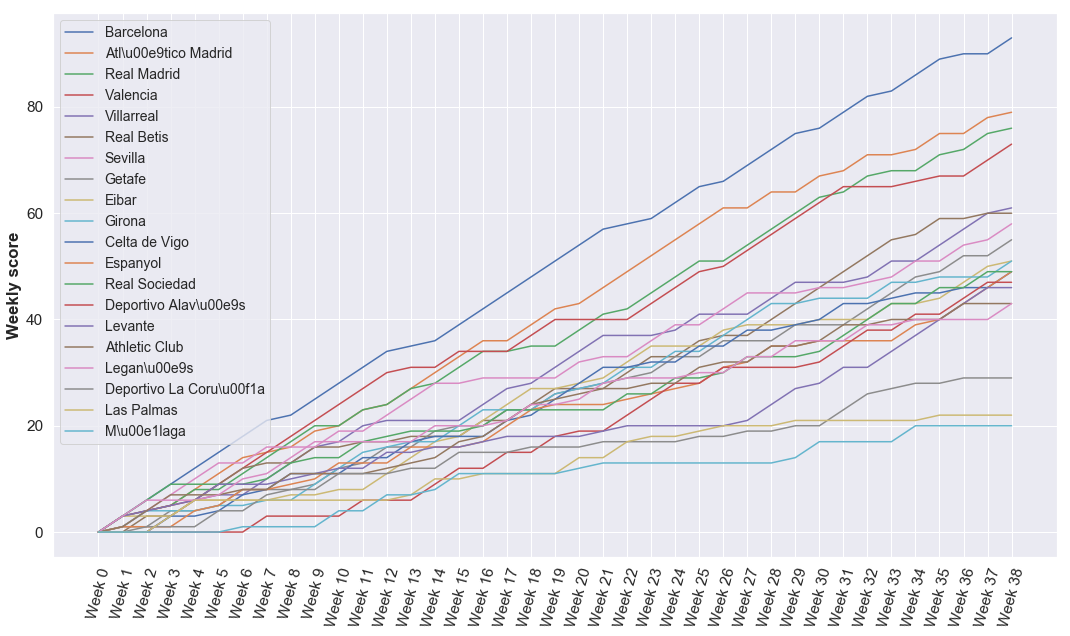

In [249]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table_esp)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_esp.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [223]:
rest={}
for i in points_table_esp.team.unique():
    t = list(points_table_esp.where(points_table_esp.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max
    


In [224]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

,teams,winning_streak
18,Valencia,8
2,Barcelona,7
14,Real Betis,6
1,Atl\u00e9tico Madrid,6
12,Levante,5
17,Sevilla,4
15,Real Madrid,4
19,Villarreal,3
3,Celta de Vigo,3
4,Deportivo Alav\u00e9s,3


In [225]:
result={}
for i in points_table_esp.team.unique():
    t = list(points_table_esp.where(points_table_esp.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [226]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

,teams,losing_streak
10,Las Palmas,8
13,M\u00e1laga,7
4,Deportivo Alav\u00e9s,6
11,Legan\u00e9s,4
16,Real Sociedad,4
12,Levante,4
18,Valencia,3
17,Sevilla,3
0,Athletic Club,3
7,Espanyol,3


#### From the data and the plot we can see that the team which has the longest winning streak is Valncia. Valencia made a winning chain of 8 matches. On the other hand, the team with highest losing streak is Las Palmas.

# ${\bullet}$Analysis for Bundesliga

#### Information needed: Teams and matches related to Germany

In [65]:
#As this is Bundesliga, we need information solely based on Germany.
team_ger=team[(team['alpha3code']=='DEU')&(team['type']=='club')]


,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
28,Bremen,Werder Bremen,2443,SV Werder Bremen,club,Germany,276,DEU,DE
29,Leverkusen,Bayer Leverkusen,2446,TSV Bayer 04 Leverkusen,club,Germany,276,DEU,DE
30,Dortmund,Borussia Dortmund,2447,BV Borussia 09 Dortmund,club,Germany,276,DEU,DE
31,M\u00fcnchen,Bayern M\u00fcnchen,2444,FC Bayern M\u00fcnchen,club,Germany,276,DEU,DE


In [66]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team_ger=team_ger.reset_index(drop=True)
team_ger.head()

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
1,Bremen,Werder Bremen,2443,SV Werder Bremen,club,Germany,276,DEU,DE
2,Leverkusen,Bayer Leverkusen,2446,TSV Bayer 04 Leverkusen,club,Germany,276,DEU,DE
3,Dortmund,Borussia Dortmund,2447,BV Borussia 09 Dortmund,club,Germany,276,DEU,DE
4,M\u00fcnchen,Bayern M\u00fcnchen,2444,FC Bayern M\u00fcnchen,club,Germany,276,DEU,DE


#### Import the matches data for germany

In [67]:
matches_ger= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_Germany.json')
pd.set_option('display.max_columns', 14)
matches_ger.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405517,34,"{'2444': {'scoreET': 0, 'coachId': 14710, 'sid...",181137,2018-05-12 13:30:00,2445,Allianz Arena,2517036,"Bayern M\u00fcnchen - Stuttgart, 1 - 4","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 379444, 'role': 'referee'}, {'r...",Regular,426
1,Played,4405517,34,"{'2482': {'scoreET': 0, 'coachId': 272299, 'si...",181137,2018-05-12 13:30:00,2482,WIRSOL Rhein-Neckar-Arena,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 384936, 'role': 'referee'}, {'r...",Regular,426
2,Played,4405517,34,"{'2457': {'scoreET': 0, 'coachId': 18987, 'sid...",181137,2018-05-12 13:30:00,2975,Olympiastadion Berlin,2517038,"Hertha BSC - RB Leipzig, 2 - 6","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 387276, 'role': 'referee'}, {'r...",Regular,426
3,Played,4405517,34,"{'2453': {'scoreET': 0, 'coachId': 14977, 'sid...",181137,2018-05-12 13:30:00,2453,Schwarzwald-Stadion,2517039,"Freiburg - Augsburg, 2 - 0","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 378957, 'role': 'referee'}, {'r...",Regular,426
4,Played,4405517,34,"{'2449': {'scoreET': 0, 'coachId': 447924, 'si...",181137,2018-05-12 13:30:00,2449,VELTINS-Arena,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 387273, 'role': 'referee'}, {'r...",Regular,426


In [68]:
results_ger = matches_ger.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_ger
# results.columns = ['result_home','result_away']
results_ger = pd.concat([matches_ger['gameweek'],results_ger,matches_ger.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_ger.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_ger.head()

,gameweek,goal_home,goal_away,team_home,team_away
0,34,1,4,Bayern M\u00fcnchen,Stuttgart
1,34,3,1,Hoffenheim,Borussia Dortmund
2,34,2,6,Hertha BSC,RB Leipzig
3,34,2,0,Freiburg,Augsburg
4,34,1,0,Schalke 04,Eintracht Frankfurt


In [69]:
results_ger['points_home'] = 0
results_ger['points_away'] = 0
for i in range(results_ger.shape[0]):
    if results_ger.loc[i,'goal_home']>results_ger.loc[i,'goal_away']:
        results_ger.loc[i,'points_home']=3
    elif results_ger.loc[i,'goal_home']<results_ger.loc[i,'goal_away']:
        results_ger.loc[i,'points_away']=3
    else:
        results_ger.loc[i,'points_home']=1
        results_ger.loc[i,'points_away']=1

In [70]:
home = results_ger[['gameweek','team_home','points_home']]
away = results_ger[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_ger = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_ger

,gameweek,team,points
0,1,Augsburg,0
1,1,Bayer Leverkusen,0
2,1,Bayern M\u00fcnchen,3
3,1,Borussia Dortmund,3
4,1,Borussia M'gladbach,3
...,...,...,...
607,34,RB Leipzig,3
608,34,Schalke 04,3
609,34,Stuttgart,3
610,34,Werder Bremen,3


In [72]:
team_list = list(points_table_ger.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,35))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,35):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_ger.loc[(points_table_ger['gameweek']==week)&(points_table_ger['team']==team),'points'])
table_ger=points_byweek
table_ger=table_ger.sort_values(by=(34),ascending=False)
table_ger=table_ger.T
pd.set_option('display.max_columns', 18)
table_ger.tail()

,Bayern M\u00fcnchen,Schalke 04,Borussia Dortmund,Bayer Leverkusen,Hoffenheim,RB Leipzig,Stuttgart,Eintracht Frankfurt,Borussia M'gladbach,Hertha BSC,Werder Bremen,Augsburg,Hannover 96,Mainz 05,Freiburg,Wolfsburg,Hamburger SV,K\u00f6ln
30,75,55,51,51,46,47,39,46,40,39,37,37,36,30,30,30,22,21
31,78,56,54,51,49,47,42,46,43,42,37,40,36,30,30,30,25,22
32,81,57,55,51,52,47,45,46,44,43,38,41,36,33,33,30,28,22
33,84,60,55,52,52,50,48,49,47,43,39,41,39,36,33,30,28,22
34,84,63,55,55,55,53,51,49,47,43,42,41,39,36,36,33,31,22


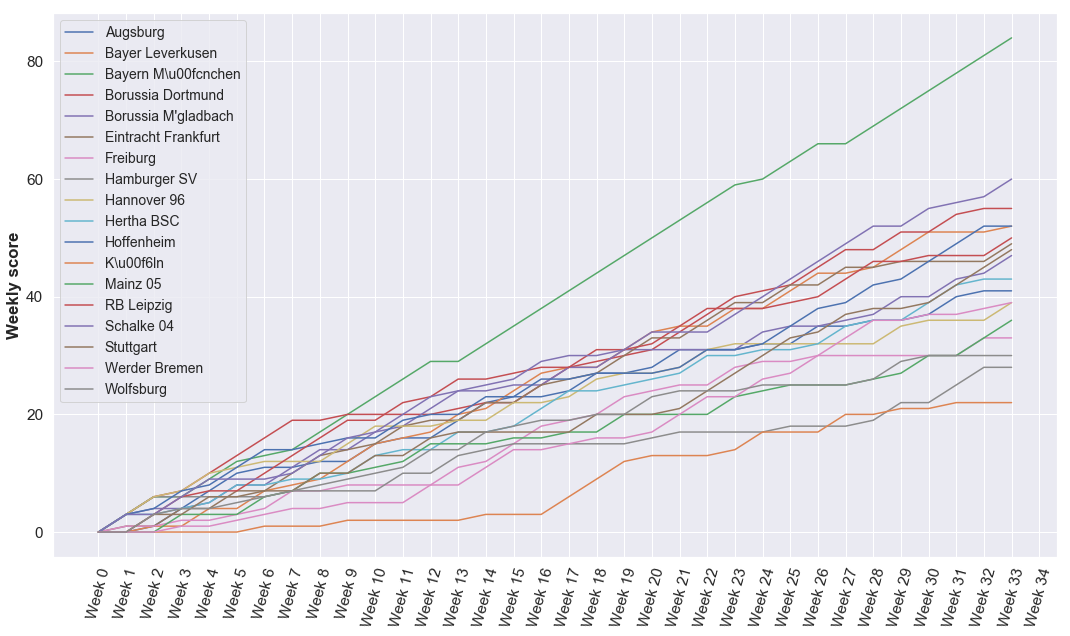

In [242]:
week = (['Week %i' %i for i in range(0, 35)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table_ger)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_ger.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [243]:
rest={}
for i in points_table_ger.team.unique():
    t = list(points_table_ger.where(points_table_ger.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [244]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

,teams,winning_streak
2,Bayern M\u00fcnchen,10
14,Schalke 04,6
3,Borussia Dortmund,4
15,Stuttgart,4
13,RB Leipzig,4
0,Augsburg,3
10,Hoffenheim,3
16,Werder Bremen,3
11,K\u00f6ln,3
12,Mainz 05,2


In [245]:
result={}
for i in points_table_ger.team.unique():
    t = list(points_table_ger.where(points_table_ger.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [246]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

,teams,losing_streak
6,Freiburg,5
8,Hannover 96,5
11,K\u00f6ln,5
4,Borussia M'gladbach,4
7,Hamburger SV,4
15,Stuttgart,4
17,Wolfsburg,3
3,Borussia Dortmund,3
5,Eintracht Frankfurt,3
12,Mainz 05,3


#### From the data and the plot we can see that the team which has the longest winning streak is Bayern Munich . Bayern Munich made a winning chain of 10 matches. On the other hand, the team with highest losing streak is Freiburg.

# ${\bullet}$Analysis for Serie A

#### Information needed: Teams and matches related to Italy

In [76]:
#As this is Serie A, we need information solely based on Italy.
team_ita=team[(team['alpha3code']=='ITA')&(team['type']=='club')]

In [77]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team_ita=team_ita.reset_index(drop=True)
team_ita.head()

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Ferrara,SPAL,3204,Societ\u00e0 Polisportiva Ars et Labor 2013,club,Italy,380,ITA,IT
1,Milano,Milan,3157,AC Milan,club,Italy,380,ITA,IT
2,Torino,Juventus,3159,Juventus FC,club,Italy,380,ITA,IT
3,Roma,Roma,3158,AS Roma,club,Italy,380,ITA,IT
4,Sassuolo,Sassuolo,3315,US Sassuolo Calcio,club,Italy,380,ITA,IT


#### Import the matches data for Italy

In [78]:
matches_ita= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_Italy.json')
pd.set_option('display.max_columns', 14)
matches_ita.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4406278,38,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",181248,2018-05-20 18:45:00,3161,,2576335,"Lazio - Internazionale, 2 - 3","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377206, 'role': 'referee'}, {'r...",Regular,524
1,Played,4406278,38,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",181248,2018-05-20 18:45:00,3158,MAPEI Stadium - Citt\u00e0 del Tricolore,2576336,"Sassuolo - Roma, 0 - 1","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377255, 'role': 'referee'}, {'r...",Regular,524
2,Played,4406278,38,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",181248,2018-05-20 16:00:00,3173,,2576329,"Cagliari - Atalanta, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377247, 'role': 'referee'}, {'r...",Regular,524
3,Played,4406278,38,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",181248,2018-05-20 16:00:00,3165,,2576330,"Chievo - Benevento, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377246, 'role': 'referee'}, {'r...",Regular,524
4,Played,4406278,38,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",181248,2018-05-20 16:00:00,3163,,2576331,"Udinese - Bologna, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377254, 'role': 'referee'}, {'r...",Regular,524


In [81]:
results_ita = matches_ita.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_ita
# results.columns = ['result_home','result_away']
results_ita = pd.concat([matches_ita['gameweek'],results_ita,matches_ita.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_ita.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_ita.head()

,gameweek,goal_home,goal_away,team_home,team_away
0,38,2,3,Lazio,Internazionale
1,38,0,1,Sassuolo,Roma
2,38,1,0,Cagliari,Atalanta
3,38,1,0,Chievo,Benevento
4,38,1,0,Udinese,Bologna


In [82]:
results_ita['points_home'] = 0
results_ita['points_away'] = 0
for i in range(results_ita.shape[0]):
    if results_ita.loc[i,'goal_home']>results_ita.loc[i,'goal_away']:
        results_ita.loc[i,'points_home']=3
    elif results_ita.loc[i,'goal_home']<results_ita.loc[i,'goal_away']:
        results_ita.loc[i,'points_away']=3
    else:
        results_ita.loc[i,'points_home']=1
        results_ita.loc[i,'points_away']=1

In [83]:
home = results_ita[['gameweek','team_home','points_home']]
away = results_ita[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_ita = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_ita

,gameweek,team,points
0,1,Atalanta,0
1,1,Benevento,0
2,1,Bologna,1
3,1,Cagliari,0
4,1,Chievo,3
...,...,...,...
755,38,SPAL,3
756,38,Sampdoria,0
757,38,Sassuolo,0
758,38,Torino,3


In [84]:
team_list = list(points_table_ita.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_ita.loc[(points_table_ita['gameweek']==week)&(points_table_ita['team']==team),'points'])
table_ita=points_byweek
table_ita=table_ita.sort_values(by=(38),ascending=False)
table_ita=table_ita.T
pd.set_option('display.max_columns', 20)
table_ita.tail()

,Juventus,Napoli,Roma,Internazionale,Lazio,Milan,Atalanta,Fiorentina,Sampdoria,Torino,Sassuolo,Genoa,Chievo,Udinese,Cagliari,Bologna,SPAL,Crotone,Hellas Verona,Benevento
34,85,84,67,66,67,54,55,51,51,47,37,41,31,33,33,39,29,31,25,17
35,88,84,70,66,70,57,58,54,54,47,37,41,31,34,33,39,32,34,25,18
36,91,85,73,69,71,60,59,57,54,48,40,41,34,34,33,39,35,34,25,18
37,92,88,74,69,72,61,60,57,54,51,43,41,37,37,36,39,35,35,25,21
38,95,91,77,72,72,64,60,57,54,54,43,41,40,40,39,39,38,35,25,21


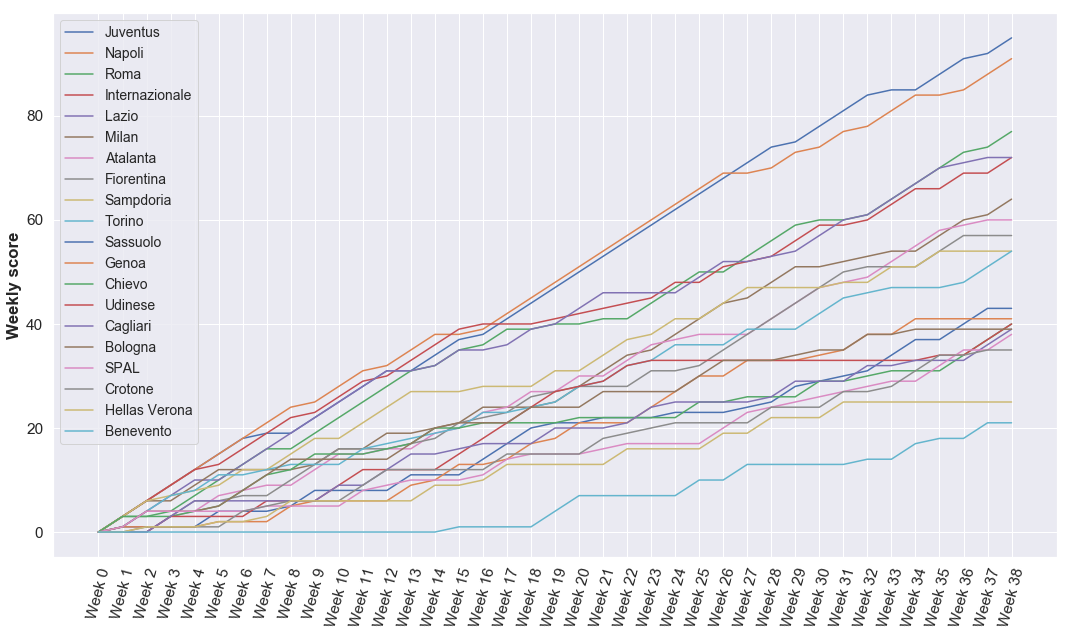

In [264]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table_ita)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_ita.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [265]:
rest={}
for i in points_table_ita.team.unique():
    t = list(points_table_ita.where(points_table_ita.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [266]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

,teams,winning_streak
10,Juventus,12
13,Napoli,10
11,Lazio,7
6,Fiorentina,6
14,Roma,5
19,Udinese,5
9,Internazionale,4
7,Genoa,3
12,Milan,3
2,Bologna,3


In [267]:
result={}
for i in points_table_ita.team.unique():
    t = list(points_table_ita.where(points_table_ita.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [268]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

,teams,losing_streak
1,Benevento,14
19,Udinese,11
3,Cagliari,5
8,Hellas Verona,5
15,SPAL,4
2,Bologna,4
4,Chievo,4
5,Crotone,4
7,Genoa,3
17,Sassuolo,3


#### From the data and the plot we can see that the team which has the longest winning streak is Juventas. Juventas made a winning chain of 12 matches. On the other hand, the team with highest losing streak is Benevento.

# ${\bullet}$Analysis for League 1

### Information needed: Teams and matches related to France

In [88]:
#As this is League 1, we need information solely based on France.
team_fra=team[(team['alpha3code']=='FRA')&(team['type']=='club')]
team_fra.head()

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,club,France,250,FRA,FR
11,Lyon,Olympique Lyonnais,3766,Olympique Lyonnais,club,France,250,FRA,FR
12,Paris,PSG,3767,Paris Saint-Germain FC,club,France,250,FRA,FR
20,Marseille,Olympique Marseille,3771,Olympique de Marseille,club,France,250,FRA,FR
21,La Chapelle-sur-Erdre,Nantes,3770,FC Nantes,club,France,250,FRA,FR


### Import the matches data for France

In [89]:
matches_fra= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_France.json')
pd.set_option('display.max_columns', 14)
matches_fra.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405655,38,"{'3783': {'scoreET': 0, 'coachId': 210513, 'si...",181189,2018-05-19 19:00:00,0,Stade Michel d'Ornano,2501056,"Caen - PSG, 0 - 0","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 384954, 'role': 'referee'}, {'r...",Regular,412
1,Played,4405655,38,"{'3804': {'scoreET': 0, 'coachId': 220743, 'si...",181189,2018-05-19 19:00:00,0,Stade Gaston-G\u00e9rard,2501057,"Dijon - Angers SCO, 2 - 1","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 385496, 'role': 'referee'}, {'r...",Regular,412
2,Played,4405655,38,"{'3766': {'scoreET': 0, 'coachId': 211238, 'si...",181189,2018-05-19 19:00:00,3766,Groupama Stadium,2501058,"Olympique Lyonnais - Nice, 3 - 2","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 386297, 'role': 'referee'}, {'r...",Regular,412
3,Played,4405655,38,"{'3771': {'scoreET': 0, 'coachId': 25691, 'sid...",181189,2018-05-19 19:00:00,3771,Stade V\u00e9lodrome,2501059,"Olympique Marseille - Amiens SC, 2 - 1","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 385529, 'role': 'referee'}, {'r...",Regular,412
4,Played,4405655,38,"{'3772': {'scoreET': 0, 'coachId': 9092, 'side...",181189,2018-05-19 19:00:00,3772,Stade Saint-Symphorien,2501060,"Metz - Bordeaux, 0 - 4","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 385796, 'role': 'referee'}, {'r...",Regular,412


In [91]:
results_fra = matches_fra.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_fra
# results.columns = ['result_home','result_away']
results_fra = pd.concat([matches_fra['gameweek'],results_fra,matches_fra.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_fra.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_fra.head()

,gameweek,goal_home,goal_away,team_home,team_away
0,38,0,0,Caen,PSG
1,38,2,1,Dijon,Angers SCO
2,38,3,2,Olympique Lyonnais,Nice
3,38,2,1,Olympique Marseille,Amiens SC
4,38,0,4,Metz,Bordeaux


In [92]:
results_fra['points_home'] = 0
results_fra['points_away'] = 0
for i in range(results_fra.shape[0]):
    if results_fra.loc[i,'goal_home']>results_fra.loc[i,'goal_away']:
        results_fra.loc[i,'points_home']=3
    elif results_fra.loc[i,'goal_home']<results_fra.loc[i,'goal_away']:
        results_fra.loc[i,'points_away']=3
    else:
        results_fra.loc[i,'points_home']=1
        results_fra.loc[i,'points_away']=1

In [93]:
home = results_fra[['gameweek','team_home','points_home']]
away = results_fra[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_fra = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_fra

,gameweek,team,points
0,1,Amiens SC,0
1,1,Angers SCO,1
2,1,Bordeaux,1
3,1,Caen,0
4,1,Dijon,0
...,...,...,...
755,38,Rennes,1
756,38,Saint-\u00c9tienne,3
757,38,Strasbourg,0
758,38,Toulouse,3


In [94]:
team_list = list(points_table_fra.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_fra.loc[(points_table_fra['gameweek']==week)&(points_table_fra['team']==team),'points'])
table_fra=points_byweek
table_fra=table_fra.sort_values(by=(38),ascending=False)
table_fra=table_fra.T
pd.set_option('display.max_columns', 18)
table_fra.head()

,PSG,Monaco,Olympique Lyonnais,Olympique Marseille,Rennes,Bordeaux,Saint-\u00c9tienne,Nice,Nantes,...,Guingamp,Amiens SC,Angers SCO,Lille,Caen,Strasbourg,Toulouse,Troyes,Metz
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0
1,3,3,3,3,1,1,3,0,0,...,3,0,1,3,0,0,0,1,0
2,6,6,6,6,1,4,6,0,0,...,3,0,4,3,0,3,3,4,0
3,9,9,7,7,2,5,9,3,3,...,3,0,5,3,3,4,3,4,0
4,12,12,8,7,2,8,9,3,4,...,6,3,6,4,6,4,6,4,0


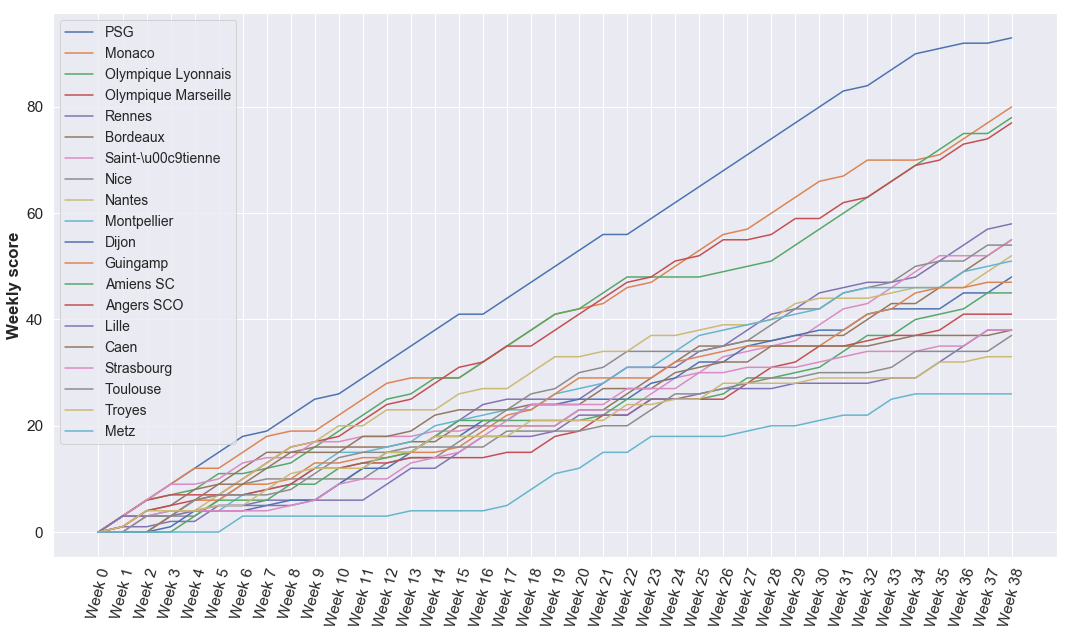

In [286]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table_fra)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_fra.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [287]:
rest={}
for i in points_table_fra.team.unique():
    t = list(points_table_fra.where(points_table_fra.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [288]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

,teams,winning_streak
14,PSG,9
12,Olympique Lyonnais,8
10,Nantes,4
13,Olympique Marseille,4
2,Bordeaux,4
8,Monaco,4
11,Nice,4
3,Caen,3
17,Strasbourg,3
6,Lille,3


In [289]:
rest={}
for i in points_table_fra.team.unique():
    t = list(points_table_fra.where(points_table_fra.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [290]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

,teams,losing_streak
7,Metz,6
0,Amiens SC,5
17,Strasbourg,4
11,Nice,4
19,Troyes,4
3,Caen,4
2,Bordeaux,4
5,Guingamp,3
6,Lille,3
9,Montpellier,3


### From the data and the plot we can see that the team which has the longest winning streak is PSG. PSG made a winning chain of 9 matches. On the other hand, the  team with highest losing streak is Metz.

##  Compilation of the results obtained from all the leagues and observing the differences.
#### Note, this comparative analysis is completely basd on the [RQ1]

 From the datasets, i.e. the leagues and the teams, we analysed five leagues, viz. the premier league, the La Liga, the Bundesliga, the Serie A and League 1. We can observe that all the leagues mentioned above are mutually exclusive in nature, that is, there is no team which can participate in more than one league simultaneously. More, the leagues are organised on country basis. So, the teams can participate according to their geographical terrirory. For example, being situated in the UK, Manchester United participates in the Premier league, not in any other league. Here, we will try to establish a table which will show us the basis similarities and disimilarities between the summary data obtained from the analysis of the leagues.

In [95]:
df= {'League_name': ['Premier league', 'La Liga','Bundesliga','Serie A','League 1'], 'country': ['England & Wales', 'Spain','Germany','Italy', 'France']
    ,'Weeks':[38,38,34,38,38],'Longest winning streak':[19,8,10,12,9],'Longest losing streak':[8,8,5,14,4]}
df=pd.DataFrame(df)
df

,League_name,country,Weeks,Longest winning streak,Longest losing streak
0,Premier league,England & Wales,38,19,8
1,La Liga,Spain,38,8,8
2,Bundesliga,Germany,34,10,5
3,Serie A,Italy,38,12,14
4,League 1,France,38,9,4


#  Bonus_[RQ4]

#### Here we will see the top 10 most efficient players for the La Liga, Bundesliga and the Sirie A along with the premier league.

# La Liga

In [96]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Import the players dataset

In [97]:

players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


### Import the event data for Spain

In [98]:
events_esp=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_Spain.json")
pd.set_option('display.max_columns', 15)
events_esp()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,Pass,682,1H,2.994582,85,180864419
1,8,Simple pass,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,Pass,682,1H,3.137020,85,180864418
2,8,Simple pass,[{'id': 1801}],364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,Pass,682,1H,6.709668,85,180864420
3,8,Simple pass,[{'id': 1801}],3534,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548,Pass,682,1H,8.805497,85,180864421
4,8,Simple pass,[{'id': 1801}],3695,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548,Pass,682,1H,14.047492,85,180864422


#### As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes. 

In [99]:
events_esp['eventName']=events_esp['eventName'].astype(str)
events_esp=events_esp[(events_esp.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)

#### Splitting the column 'Tags' that is a dictionary

In [100]:
TAG1=[]
for i in range(len(events_esp.tags)):
    try:
        TAG1.append(str(events_esp.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events_esp.tags)):
    try:
        TAG2.append(str(events_esp.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events_esp.tags)):
    try:
        TAG3.append(str(events_esp.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events_esp.tags)):
    try:
        TAG4.append(str(events_esp.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events_esp=[events_esp,TAG]
events_esp=pd.concat(mix_events_esp,  axis=1,  sort=False).reindex(events_esp.index)
events_esp=events_esp.drop('tags',axis=1)

In [101]:
events_esp['eventName'] = events_esp['eventName'].astype(str)
events_esp=events_esp[(events_esp.eventName.str.contains('Pass'))]
events_esp.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,3542.0,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548.0,Pass,682.0,1H,2.994582,85,180864419.0,1801,Notag,Notag,Notag
1,8.0,Simple pass,274435.0,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548.0,Pass,682.0,1H,3.137020,85,180864418.0,1801,Notag,Notag,Notag
2,8.0,Simple pass,364860.0,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548.0,Pass,682.0,1H,6.709668,85,180864420.0,1801,Notag,Notag,Notag
3,8.0,Simple pass,3534.0,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548.0,Pass,682.0,1H,8.805497,85,180864421.0,1801,Notag,Notag,Notag
4,8.0,Simple pass,3695.0,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548.0,Pass,682.0,1H,14.047492,85,180864422.0,1801,Notag,Notag,Notag


#### Counting the number of passes with respect to the player id

In [307]:
passes=events_esp
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player_esp=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player_esp['Numberofpasses'] = passes_player_esp.groupby('PlayerId')['PlayerId'].transform('count')
passes_player_esp

,PlayerId,Numberofpasses
0,3542.0,1753
1,274435.0,346
2,364860.0,2338
3,3534.0,1353
4,3695.0,1390
...,...,...
318717,3486.0,37
318718,3695.0,1390
318719,20623.0,490
318720,122832.0,16


#### In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [309]:
#calculating Mean
#Calculating Standard deviation
Mean=passes_player_esp.Numberofpasses.mean()
std=passes_player_esp.Numberofpasses.std()
Mean=int(Mean)
std=int(std)
#Calculating Lower bound
lower_bound=Mean-std
ID_passes_threshold_esp=[]
frequency_passes_threshold_esp=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player_esp.Numberofpasses)):
    frequency_passes.append(float(passes_player_esp.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player_esp.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold_esp.append(int(frequency_passes[i]))
        ID_passes_threshold_esp.append(int(ID_passes[i]))

In [310]:
passes_threshold_esp=pd.DataFrame(ID_passes_threshold_esp, columns=['PlayerId'])
passes_threshold_esp.insert(1, "Numberofpasses",frequency_passes_threshold_esp, True)
passes_threshold_esp.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold_esp

,PlayerId,Numberofpasses
0,3542,1753
1,364860,2338
2,3534,1353
3,3695,1390
4,3277,1333
...,...,...
149219,112366,542
151293,20803,542
151302,424624,604
152935,364850,559


In [312]:
events_esp_tag2=events_esp.loc[events_esp['Tag2'] == '1801']
events_esp_tag1=events_esp.loc[events_esp['Tag1']=='1801']
events_esp_tag3=events_esp.loc[events_esp['Tag3']=='1801']
events_esp_tag4=events_esp.loc[events_esp['Tag4']=='1801']
events_esp_tag=[events_esp_tag1,events_esp_tag2,events_esp_tag3,events_esp_tag4]
success_esp=pd.concat(events_esp_tag, axis=0)
success_esp.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,3542.0,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548.0,Pass,682.0,1H,2.994582,85,180864419.0,1801,Notag,Notag,Notag
1,8.0,Simple pass,274435.0,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548.0,Pass,682.0,1H,3.137020,85,180864418.0,1801,Notag,Notag,Notag
2,8.0,Simple pass,364860.0,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548.0,Pass,682.0,1H,6.709668,85,180864420.0,1801,Notag,Notag,Notag
3,8.0,Simple pass,3534.0,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548.0,Pass,682.0,1H,8.805497,85,180864421.0,1801,Notag,Notag,Notag
4,8.0,Simple pass,3695.0,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548.0,Pass,682.0,1H,14.047492,85,180864422.0,1801,Notag,Notag,Notag


In [313]:
S=[]
for i in range(len(success_esp.playerId)):
   S.append(success_esp.playerId.iloc[i])
success_esp_new=pd.DataFrame(S , columns=['PlayerId'])
success_esp_new['Numberofpasses'] = success_esp_new.groupby('PlayerId')['PlayerId'].transform('count')
success_esp_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_esp_new

,PlayerId,Numberofpasses
0,3542.0,766
1,274435.0,149
2,364860.0,1064
3,3534.0,583
4,3695.0,606
...,...,...
117636,7864.0,49
119552,3779.0,4
121694,247150.0,20
123531,3604.0,2


In [314]:
final_passes_esp=pd.merge(success_esp_new, passes_threshold_esp, on='PlayerId')
final_passes_esp=final_passes_esp.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes_esp.head()

,PlayerId,AccuratePassesNumber,TotalPassesNumber
0,3542.0,766,1753
1,364860.0,1064,2338
2,3534.0,583,1353
3,3695.0,606,1390
4,3277.0,689,1333


In [315]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
espteams = teams[(teams["alpha3code"]=="ESP") & (teams["type"]=="club")]
espplayer = players.merge(espteams, left_on="currentTeamId", right_on="wyId")
espplayer=espplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','officialName','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

espplayer=espplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
espplayer=espplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes_esp=pd.merge(espplayer, final_passes_esp, on='PlayerId')
final_player_passes_esp.head()

,birthDate,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber
0,1988-11-20,254,R. Rosales,592,1475
1,1991-01-11,3568,Recio,682,887
2,1984-09-14,3645,Chory Castro,345,873
3,1988-05-25,3705,Adri\u00e1n,479,980
4,1986-02-10,3719,Roberto,241,508


In [316]:
Efficiency_esp=[]
for i in range(len(final_player_passes_esp.AccuratePassesNumber)):
    total=final_player_passes_esp.TotalPassesNumber.iloc[i]
    accurate=final_player_passes_esp.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency_esp.append(Ratio)
Efficiency_esp=pd.DataFrame(Efficiency_esp)

In [317]:
final_player_passes_esp.insert(4,'Efficiency',Efficiency_esp)
final_player_ratio_esp=final_player_passes_esp

final_player_ratio_esp.head()

,birthDate,PlayerId,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1988-11-20,254,R. Rosales,592,0.401356,1475
1,1991-01-11,3568,Recio,682,0.768884,887
2,1984-09-14,3645,Chory Castro,345,0.395189,873
3,1988-05-25,3705,Adri\u00e1n,479,0.488776,980
4,1986-02-10,3719,Roberto,241,0.474409,508


In [318]:
#The top 10 players
bestefficiency_esp=final_player_ratio_esp.nlargest(10, ['Efficiency']) 
bestefficiency_esp=bestefficiency_esp.reset_index()
bestefficiency_esp=bestefficiency_esp.drop(columns=['index','PlayerId'])
bestefficiency_esp=bestefficiency_esp.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency_esp

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,birthDate,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1990-09-15,Bigas,504,0.904847,557
1,1989-11-14,Font\u00e0s,587,0.845821,694
2,1991-01-11,Recio,682,0.768884,887
3,1989-12-23,Z. Feddal,548,0.718218,763
4,1989-11-26,Juan Cala,390,0.707804,551
5,1993-01-20,Fede Cartabia,370,0.696798,531
6,1985-10-14,G. Cabral,825,0.676784,1219
7,1989-03-26,S. Kj\u00e6r,509,0.673280,756
8,1998-07-22,F. Valverde,363,0.656420,553
9,1992-03-27,V.Lindelof,382,0.648557,589


## Bundsliga

In [319]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Import the players dataset

In [102]:

players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


### Import the event data for Germany

In [103]:
events_ger=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_Germany.json")
pd.set_option('display.max_columns', 15)
events_ger.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443
2,8,Simple pass,[{'id': 1801}],14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739,Pass,2446,1H,6.946706,85,179896444
3,8,Simple pass,[{'id': 1801}],14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739,Pass,2446,1H,10.786491,85,179896445
4,8,Simple pass,[{'id': 1801}],14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739,Pass,2446,1H,12.684514,85,179896446


#### As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes.

In [104]:
events_ger['eventName']=events_ger['eventName'].astype(str)
events_ger=events_ger[(events_ger.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)

#### Splitting the column 'Tags' that is a dictionary

In [105]:
TAG1=[]
for i in range(len(events_ger.tags)):
    try:
        TAG1.append(str(events_ger.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events_ger.tags)):
    try:
        TAG2.append(str(events_ger.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events_ger.tags)):
    try:
        TAG3.append(str(events_ger.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events_ger.tags)):
    try:
        TAG4.append(str(events_ger.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events_ger=[events_ger,TAG]
events_ger=pd.concat(mix_events_ger,  axis=1,  sort=False).reindex(events_ger.index)
events_ger=events_ger.drop('tags',axis=1)


In [106]:
events_ger['eventName'] = events_ger['eventName'].astype(str)
events_ger=events_ger[(events_ger.eventName.str.contains('Pass'))]
events_ger.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,15231.0,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739.0,Pass,2446.0,1H,2.409746,85,179896442.0,1801,Notag,Notag,Notag
1,8.0,Simple pass,14786.0,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739.0,Pass,2446.0,1H,2.506082,85,179896443.0,1801,Notag,Notag,Notag
2,8.0,Simple pass,14803.0,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739.0,Pass,2446.0,1H,6.946706,85,179896444.0,1801,Notag,Notag,Notag
3,8.0,Simple pass,14768.0,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739.0,Pass,2446.0,1H,10.786491,85,179896445.0,1801,Notag,Notag,Notag
4,8.0,Simple pass,14803.0,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739.0,Pass,2446.0,1H,12.684514,85,179896446.0,1801,Notag,Notag,Notag


####  Counting the number of passes with respect to the player id

In [331]:
passes=events_ger
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player_ger=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player_ger['Numberofpasses'] = passes_player_ger.groupby('PlayerId')['PlayerId'].transform('count')
passes_player_ger

,PlayerId,Numberofpasses
0,15231.0,716
1,14786.0,509
2,14803.0,1473
3,14768.0,883
4,14803.0,1473
...,...,...
261457,16843.0,1444
261458,275384.0,920
261459,15194.0,522
261460,14917.0,1336


#### In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [332]:
#calculating Mean
#Calculating Standard deviation
Mean=passes_player_ger.Numberofpasses.mean()
std=passes_player_ger.Numberofpasses.std()
Mean=int(Mean)
std=int(std)
#Calculating Lower bound
lower_bound=Mean-std
ID_passes_threshold_ger=[]
frequency_passes_threshold_ger=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player_ger.Numberofpasses)):
    frequency_passes.append(float(passes_player_ger.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player_ger.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold_ger.append(int(frequency_passes[i]))
        ID_passes_threshold_ger.append(int(ID_passes[i]))

In [333]:
passes_threshold_ger=pd.DataFrame(ID_passes_threshold_ger, columns=['PlayerId'])
passes_threshold_ger.insert(1, "Numberofpasses",frequency_passes_threshold_ger, True)
passes_threshold_ger.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold_ger

,PlayerId,Numberofpasses
0,15231,716
1,14786,509
2,14803,1473
3,14768,883
5,40657,1163
...,...,...
78219,221172,592
103200,14887,584
110615,19720,742
128400,297957,580


In [334]:
events_ger_tag2=events_ger.loc[events_ger['Tag2'] == '1801']
events_ger_tag1=events_ger.loc[events_ger['Tag1']=='1801']
events_ger_tag3=events_ger.loc[events_ger['Tag3']=='1801']
events_ger_tag4=events_ger.loc[events_ger['Tag4']=='1801']
events_ger_tag=[events_ger_tag1,events_ger_tag2,events_ger_tag3,events_ger_tag4]
success_ger=pd.concat(events_ger_tag, axis=0)
success_ger.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,15231.0,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739.0,Pass,2446.0,1H,2.409746,85,179896442.0,1801,Notag,Notag,Notag
1,8.0,Simple pass,14786.0,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739.0,Pass,2446.0,1H,2.506082,85,179896443.0,1801,Notag,Notag,Notag
2,8.0,Simple pass,14803.0,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739.0,Pass,2446.0,1H,6.946706,85,179896444.0,1801,Notag,Notag,Notag
3,8.0,Simple pass,14768.0,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739.0,Pass,2446.0,1H,10.786491,85,179896445.0,1801,Notag,Notag,Notag
4,8.0,Simple pass,14803.0,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739.0,Pass,2446.0,1H,12.684514,85,179896446.0,1801,Notag,Notag,Notag


In [335]:
S=[]
for i in range(len(success_ger.playerId)):
   S.append(success_ger.playerId.iloc[i])
success_ger_new=pd.DataFrame(S , columns=['PlayerId'])
success_ger_new['Numberofpasses'] = success_ger_new.groupby('PlayerId')['PlayerId'].transform('count')
success_ger_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_ger_new

,PlayerId,Numberofpasses
0,15231.0,263
1,14786.0,237
2,14803.0,629
3,14768.0,393
5,40657.0,459
...,...,...
94854,14887.0,77
96732,372316.0,1
98961,399599.0,9
99320,217052.0,8


In [336]:
final_passes_ger=pd.merge(success_ger_new, passes_threshold_ger, on='PlayerId')
final_passes_ger=final_passes_ger.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes_ger

,PlayerId,AccuratePassesNumber,TotalPassesNumber
0,15231.0,263,716
1,14786.0,237,509
2,14803.0,629,1473
3,14768.0,393,883
4,40657.0,459,1163
...,...,...,...
221,134392.0,311,956
222,14988.0,155,666
223,14789.0,79,506
224,221172.0,71,592


In [337]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
gerteams = teams[(teams["alpha3code"]=="DEU") & (teams["type"]=="club")]
gerplayer = players.merge(gerteams, left_on="currentTeamId", right_on="wyId")
gerplayer=gerplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','officialName','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

gerplayer=gerplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
gerplayer=gerplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes_ger=pd.merge(gerplayer, final_passes_ger, on='PlayerId')
final_player_passes_ger

,birthDate,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber
0,1999-05-25,393247,I. Konat\u00e9,284,606
1,1994-03-17,65596,M. Sabitzer,382,829
2,1995-05-14,296341,Bernardo,235,682
3,1994-10-24,70975,Bruma,319,785
4,1997-05-27,282804,K. Laimer,207,604
...,...,...,...,...,...
215,1991-03-14,14749,G. Sakai,391,1130
216,1992-02-23,14857,K. Papadopoulos,473,1058
217,1990-09-18,14864,L. Holtby,98,524
218,1992-11-01,127796,F. Kosti\u0107,175,704


In [338]:
Efficiency_ger=[]
for i in range(len(final_player_passes_ger.AccuratePassesNumber)):
    total=final_player_passes_ger.TotalPassesNumber.iloc[i]
    accurate=final_player_passes_ger.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency_ger.append(Ratio)
Efficiency_ger=pd.DataFrame(Efficiency_ger)

In [339]:
final_player_passes_ger.insert(4,'Efficiency',Efficiency_ger)
final_player_ratio_ger=final_player_passes_ger
final_player_ratio_ger

,birthDate,PlayerId,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1999-05-25,393247,I. Konat\u00e9,284,0.468647,606
1,1994-03-17,65596,M. Sabitzer,382,0.460796,829
2,1995-05-14,296341,Bernardo,235,0.344575,682
3,1994-10-24,70975,Bruma,319,0.406369,785
4,1997-05-27,282804,K. Laimer,207,0.342715,604
...,...,...,...,...,...,...
215,1991-03-14,14749,G. Sakai,391,0.346018,1130
216,1992-02-23,14857,K. Papadopoulos,473,0.447070,1058
217,1990-09-18,14864,L. Holtby,98,0.187023,524
218,1992-11-01,127796,F. Kosti\u0107,175,0.248580,704


In [340]:
bestefficiency_ger=final_player_ratio_ger.nlargest(10, ['Efficiency']) 
bestefficiency_ger=bestefficiency_ger.reset_index()
bestefficiency_ger=bestefficiency_ger.drop(columns=['index','PlayerId'])
bestefficiency_ger=bestefficiency_ger.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency_ger

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,birthDate,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1991-09-27,M. Halstenberg,456,0.807080,565
1,1983-05-28,M. Lehmann,613,0.780892,785
2,1996-06-13,K. Coman,418,0.716981,583
3,1993-07-03,K. Demirbay,435,0.698234,623
4,1994-03-13,Y. Gerhardt,376,0.693727,542
5,1997-09-09,F. Uduokhai,581,0.676368,859
6,1988-01-15,S. Langkamp,468,0.642857,728
7,1988-09-05,N. \u015eahin,643,0.634748,1013
8,1995-09-18,M. Meyer,637,0.626969,1016
9,1987-05-22,V.Lindelof,687,0.619477,1109


### The above table shows the top 10 most efficient players. We can observe that the highest efficiency is 89.03% in the Bundesliga.

## Serie-A

In [1]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Import the players dataset

In [2]:
players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


###  Import the event data for Italy

In [3]:
events_ita=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_italy.json")
pd.set_option('display.max_columns', 15)
events_ita.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],8327,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959,Pass,3158,1H,2.530536,85,180423957
1,8,Simple pass,[{'id': 1801}],20438,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959,Pass,3158,1H,3.768418,85,180423958
2,7,Touch,[],8306,"[{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]",2575959,Others on the ball,3158,1H,4.868265,72,180423959
3,1,Ground attacking duel,"[{'id': 504}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 56, 'x': 78}, {'y': 15, 'x': 64}]",2575959,Duel,3158,1H,8.114676,11,180423960
4,1,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 15, 'x': 64}, {'y': 15, 'x': 72}]",2575959,Duel,3158,1H,8.647892,11,180423961


#### As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes. 

In [4]:
events_ita['eventName']=events_ita['eventName'].astype(str)
events_ita=events_ita[(events_ita.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)

####  Splitting the column 'Tags' that is a dictionary

In [5]:
TAG1=[]
for i in range(len(events_ita.tags)):
    try:
        TAG1.append(str(events_ita.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events_ita.tags)):
    try:
        TAG2.append(str(events_ita.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events_ita.tags)):
    try:
        TAG3.append(str(events_ita.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events_ita.tags)):
    try:
        TAG4.append(str(events_ita.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events_ita=[events_ita,TAG]
events_ita=pd.concat(mix_events_ita,  axis=1,  sort=False).reindex(events_ita.index)
events_ita=events_ita.drop('tags',axis=1)

In [6]:
events_ita['eventName'] = events_ita['eventName'].astype(str)
events_ita=events_ita[(events_ita.eventName.str.contains('Pass'))]
events_ita.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,8327.0,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959.0,Pass,3158.0,1H,2.530536,85,180423957.0,1801,Notag,Notag,Notag
1,8.0,Simple pass,20438.0,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959.0,Pass,3158.0,1H,3.768418,85,180423958.0,1801,Notag,Notag,Notag
5,8.0,Simple pass,8306.0,"[{'y': 15, 'x': 72}, {'y': 25, 'x': 72}]",2575959.0,Pass,3158.0,1H,10.376066,85,180423962.0,1801,Notag,Notag,Notag
10,8.0,Simple pass,86366.0,"[{'y': 82, 'x': 38}, {'y': 88, 'x': 43}]",2575959.0,Pass,3172.0,1H,16.240563,85,180423979.0,1801,Notag,Notag,Notag
14,8.0,Simple pass,8306.0,"[{'y': 15, 'x': 61}, {'y': 15, 'x': 37}]",2575959.0,Pass,3158.0,1H,19.153235,85,180423968.0,1801,Notag,Notag,Notag


#### Counting the number of passes with respect to the player id

In [351]:
passes=events_ita
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player_ita=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player_ita['Numberofpasses'] = passes_player_ita.groupby('PlayerId')['PlayerId'].transform('count')
passes_player_ita

,PlayerId,Numberofpasses
0,8327.0,704
1,20438.0,1219
2,8306.0,2043
3,86366.0,1051
4,8306.0,2043
...,...,...
337312,70974.0,247
337313,349102.0,323
337314,413041.0,169
337315,206318.0,899


####  In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [352]:
#calculating Mean
#Calculating Standard deviation
Mean=passes_player_ita.Numberofpasses.mean()
std=passes_player_ita.Numberofpasses.std()
Mean=int(Mean)
std=int(std)
#Calculating Lower bound
lower_bound=Mean-std
ID_passes_threshold_ita=[]
frequency_passes_threshold_ita=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player_ita.Numberofpasses)):
    frequency_passes.append(float(passes_player_ita.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player_ita.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold_ita.append(int(frequency_passes[i]))
        ID_passes_threshold_ita.append(int(ID_passes[i]))

In [353]:
passes_threshold_ita=pd.DataFrame(ID_passes_threshold_ita, columns=['PlayerId'])
passes_threshold_ita.insert(1, "Numberofpasses",frequency_passes_threshold_ita, True)
passes_threshold_ita.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold_ita

,PlayerId,Numberofpasses
0,8327,704
1,20438,1219
2,8306,2043
3,86366,1051
5,20518,1128
...,...,...
157133,8291,687
160230,3344,724
165435,51145,573
172091,7858,674


In [354]:
events_ita_tag2=events_ita.loc[events_ita['Tag2'] == '1801']
events_ita_tag1=events_ita.loc[events_ita['Tag1']=='1801']
events_ita_tag3=events_ita.loc[events_ita['Tag3']=='1801']
events_ita_tag4=events_ita.loc[events_ita['Tag4']=='1801']
events_ita_tag=[events_ita_tag1,events_ita_tag2,events_ita_tag3,events_ita_tag4]
success_ita=pd.concat(events_ita_tag, axis=0)
success_ita.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,8327.0,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959.0,Pass,3158.0,1H,2.530536,85,180423957.0,1801,Notag,Notag,Notag
1,8.0,Simple pass,20438.0,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959.0,Pass,3158.0,1H,3.768418,85,180423958.0,1801,Notag,Notag,Notag
5,8.0,Simple pass,8306.0,"[{'y': 15, 'x': 72}, {'y': 25, 'x': 72}]",2575959.0,Pass,3158.0,1H,10.376066,85,180423962.0,1801,Notag,Notag,Notag
10,8.0,Simple pass,86366.0,"[{'y': 82, 'x': 38}, {'y': 88, 'x': 43}]",2575959.0,Pass,3172.0,1H,16.240563,85,180423979.0,1801,Notag,Notag,Notag
14,8.0,Simple pass,8306.0,"[{'y': 15, 'x': 61}, {'y': 15, 'x': 37}]",2575959.0,Pass,3158.0,1H,19.153235,85,180423968.0,1801,Notag,Notag,Notag


In [355]:
S=[]
for i in range(len(success_ita.playerId)):
   S.append(success_ita.playerId.iloc[i])
success_ita_new=pd.DataFrame(S , columns=['PlayerId'])
success_ita_new['Numberofpasses'] = success_ita_new.groupby('PlayerId')['PlayerId'].transform('count')
success_ita_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_ita_new

,PlayerId,Numberofpasses
0,8327.0,288
1,20438.0,626
2,8306.0,1004
3,86366.0,523
5,20518.0,548
...,...,...
118470,424241.0,56
124649,352722.0,8
131244,3548.0,3
133979,286225.0,3


In [356]:
final_passes_ita=pd.merge(success_ita_new, passes_threshold_ita, on='PlayerId')
final_passes_ita=final_passes_ita.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes_ita

,PlayerId,AccuratePassesNumber,TotalPassesNumber
0,8327.0,288,704
1,20438.0,626,1219
2,8306.0,1004,2043
3,86366.0,523,1051
4,20518.0,548,1128
...,...,...,...
243,50069.0,211,786
244,20429.0,312,1027
245,20395.0,227,702
246,40806.0,97,609


In [357]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
itateams = teams[(teams["alpha3code"]=="ITA") & (teams["type"]=="club")]
itaplayer = players.merge(itateams, left_on="currentTeamId", right_on="wyId")
itaplayer=itaplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','officialName','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

itaplayer=itaplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
itaplayer=itaplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes_ita=pd.merge(itaplayer, final_passes_ita, on='PlayerId')
final_player_passes_ita


,birthDate,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber
0,1993-12-19,131184,Ali Adnan,262,639
1,1990-05-04,394,B. Nuytinck,569,1177
2,1994-12-03,265172,A. Bar\u00e1k,501,1112
3,1995-05-07,134508,S. Fofana,456,892
4,1997-08-11,300669,A. Bali\u0107,122,519
...,...,...,...,...,...
232,1992-11-10,21468,M. Perin,313,711
233,1993-01-14,22381,Daniel Bessa,549,837
234,1992-03-02,22883,A. Izzo,461,781
235,1985-05-09,20776,L. Rossettini,513,966


In [358]:
Efficiency_ita=[]
for i in range(len(final_player_passes_ita.AccuratePassesNumber)):
    total=final_player_passes_ita.TotalPassesNumber.iloc[i]
    accurate=final_player_passes_ita.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency_ita.append(Ratio)
Efficiency_ita=pd.DataFrame(Efficiency_ita)

In [359]:
final_player_passes_ita.insert(4,'Efficiency',Efficiency_ita)
final_player_ratio_ita=final_player_passes_ita
final_player_ratio_ita

,birthDate,PlayerId,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1993-12-19,131184,Ali Adnan,262,0.410016,639
1,1990-05-04,394,B. Nuytinck,569,0.483432,1177
2,1994-12-03,265172,A. Bar\u00e1k,501,0.450540,1112
3,1995-05-07,134508,S. Fofana,456,0.511211,892
4,1997-08-11,300669,A. Bali\u0107,122,0.235067,519
...,...,...,...,...,...,...
232,1992-11-10,21468,M. Perin,313,0.440225,711
233,1993-01-14,22381,Daniel Bessa,549,0.655914,837
234,1992-03-02,22883,A. Izzo,461,0.590269,781
235,1985-05-09,20776,L. Rossettini,513,0.531056,966


In [360]:
bestefficiency_ita=final_player_ratio_ita.nlargest(10, ['Efficiency']) 
bestefficiency_ita=bestefficiency_ita.reset_index()
bestefficiency_ita=bestefficiency_ita.drop(columns=['index','PlayerId'])
bestefficiency_ita=bestefficiency_ita.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency_ita

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,birthDate,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1991-02-01,F. Ghoulam,723,0.890394,812
1,1993-01-12,G. Di Chiara,442,0.827715,534
2,1990-08-26,M. Musacchio,689,0.752183,916
3,1985-01-18,R. Montolivo,470,0.697329,674
4,1991-05-01,B. Salamon,592,0.697291,849
5,1989-05-24,A. Taarabt,498,0.693593,718
6,1988-07-03,T. Heurtaux,360,0.688337,523
7,1986-12-07,L. Memushaj,417,0.683607,610
8,1993-01-14,Daniel Bessa,549,0.655914,837
9,1987-07-17,V.Lindelof,465,0.655853,709


### The above table shows the top 10 most efficient players. We can observe that the highest efficiency is 89.03% in the Serie-A.

## League 1

In [375]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

####  Import the players dataset

In [7]:

players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


#### Import the event data for France

In [8]:
events_fra=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_France.json")
pd.set_option('display.max_columns', 15)
events_fra.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],253784,"[{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]",2500686,Pass,3799,1H,1.935181,85,176505119
1,8,High pass,[{'id': 1801}],29474,"[{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]",2500686,Pass,3799,1H,3.599295,83,176505121
2,1,Air duel,"[{'id': 703}, {'id': 1801}]",253784,"[{'y': 74, 'x': 68}, {'y': 54, 'x': 72}]",2500686,Duel,3799,1H,6.827043,10,176505122
3,1,Air duel,"[{'id': 701}, {'id': 1802}]",56441,"[{'y': 26, 'x': 32}, {'y': 46, 'x': 28}]",2500686,Duel,3772,1H,6.985577,10,176505017
4,1,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",366760,"[{'y': 54, 'x': 72}, {'y': 55, 'x': 73}]",2500686,Duel,3799,1H,9.511272,11,176505124


####  As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes. 

In [9]:
events_fra['eventName']=events_fra['eventName'].astype(str)
events_fra=events_fra[(events_fra.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)

#### Splitting the column 'Tags' that is a dictionary

In [10]:
TAG1=[]
for i in range(len(events_fra.tags)):
    try:
        TAG1.append(str(events_fra.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events_fra.tags)):
    try:
        TAG2.append(str(events_fra.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events_fra.tags)):
    try:
        TAG3.append(str(events_fra.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events_fra.tags)):
    try:
        TAG4.append(str(events_fra.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events_fra=[events_fra,TAG]
events_fra=pd.concat(mix_events_fra,  axis=1,  sort=False).reindex(events_fra.index)
events_fra=events_fra.drop('tags',axis=1)

In [11]:
events_fra['eventName'] = events_fra['eventName'].astype(str)
events_fra=events_fra[(events_fra.eventName.str.contains('Pass'))]
events_fra.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,253784.0,"[{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]",2500686.0,Pass,3799.0,1H,1.935181,85,176505119.0,1801,Notag,Notag,Notag
1,8.0,High pass,29474.0,"[{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]",2500686.0,Pass,3799.0,1H,3.599295,83,176505121.0,1801,Notag,Notag,Notag
10,8.0,Simple pass,56441.0,"[{'y': 40, 'x': 27}, {'y': 40, 'x': 34}]",2500686.0,Pass,3772.0,1H,13.710413,85,176505021.0,1801,Notag,Notag,Notag
12,8.0,Hand pass,26245.0,"[{'y': 46, 'x': 13}, {'y': 86, 'x': 34}]",2500686.0,Pass,3799.0,1H,19.984771,81,176505135.0,1801,Notag,Notag,Notag
13,8.0,Simple pass,26086.0,"[{'y': 86, 'x': 34}, {'y': 39, 'x': 32}]",2500686.0,Pass,3799.0,1H,26.513924,85,176505137.0,1801,Notag,Notag,Notag


#### Counting the number of passes with respect to the player id

In [381]:
passes=events_fra
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player_fra=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player_fra['Numberofpasses'] = passes_player_fra.groupby('PlayerId')['PlayerId'].transform('count')
passes_player_fra

,PlayerId,Numberofpasses
0,253784.0,64
1,29474.0,1130
2,56441.0,1497
3,26245.0,169
4,26086.0,1070
...,...,...
319193,263802.0,784
319194,3450.0,504
319195,295761.0,895
319196,249926.0,266


#### In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [382]:
#calculating Mean
#Calculating Standard deviation
Mean=passes_player_fra.Numberofpasses.mean()
std=passes_player_fra.Numberofpasses.std()
Mean=int(Mean)
std=int(std)
#Calculating Lower bound
lower_bound=Mean-std
ID_passes_threshold_fra=[]
frequency_passes_threshold_fra=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player_fra.Numberofpasses)):
    frequency_passes.append(float(passes_player_fra.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player_fra.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold_fra.append(int(frequency_passes[i]))
        ID_passes_threshold_fra.append(int(ID_passes[i]))

In [383]:
passes_threshold_fra=pd.DataFrame(ID_passes_threshold_fra, columns=['PlayerId'])
passes_threshold_fra.insert(1, "Numberofpasses",frequency_passes_threshold_fra, True)
passes_threshold_fra.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold_fra

,PlayerId,Numberofpasses
0,29474,1130
1,56441,1497
2,26086,1070
5,26265,1269
6,274344,1138
...,...,...
136053,410062,827
140676,25649,1251
147125,41127,611
156078,14801,812


In [384]:
events_fra_tag2=events_fra.loc[events_fra['Tag2'] == '1801']
events_fra_tag1=events_fra.loc[events_fra['Tag1']=='1801']
events_fra_tag3=events_fra.loc[events_fra['Tag3']=='1801']
events_fra_tag4=events_fra.loc[events_fra['Tag4']=='1801']
events_fra_tag=[events_fra_tag1,events_fra_tag2,events_fra_tag3,events_fra_tag4]
success_fra=pd.concat(events_fra_tag, axis=0)
success_fra.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,253784.0,"[{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]",2500686.0,Pass,3799.0,1H,1.935181,85,176505119.0,1801,Notag,Notag,Notag
1,8.0,High pass,29474.0,"[{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]",2500686.0,Pass,3799.0,1H,3.599295,83,176505121.0,1801,Notag,Notag,Notag
10,8.0,Simple pass,56441.0,"[{'y': 40, 'x': 27}, {'y': 40, 'x': 34}]",2500686.0,Pass,3772.0,1H,13.710413,85,176505021.0,1801,Notag,Notag,Notag
12,8.0,Hand pass,26245.0,"[{'y': 46, 'x': 13}, {'y': 86, 'x': 34}]",2500686.0,Pass,3799.0,1H,19.984771,81,176505135.0,1801,Notag,Notag,Notag
13,8.0,Simple pass,26086.0,"[{'y': 86, 'x': 34}, {'y': 39, 'x': 32}]",2500686.0,Pass,3799.0,1H,26.513924,85,176505137.0,1801,Notag,Notag,Notag


In [385]:
S=[]
for i in range(len(success_fra.playerId)):
   S.append(success_fra.playerId.iloc[i])
success_fra_new=pd.DataFrame(S , columns=['PlayerId'])
success_fra_new['Numberofpasses'] = success_fra_new.groupby('PlayerId')['PlayerId'].transform('count')
success_fra_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_fra_new

,PlayerId,Numberofpasses
0,253784.0,47
1,29474.0,697
2,56441.0,682
3,26245.0,143
4,26086.0,469
...,...,...
120238,397030.0,16
121479,26131.0,6
121956,25503.0,20
122125,37796.0,10


In [386]:
final_passes_fra=pd.merge(success_fra_new, passes_threshold_fra, on='PlayerId')
final_passes_fra=final_passes_fra.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes_fra

,PlayerId,AccuratePassesNumber,TotalPassesNumber
0,29474.0,697,1130
1,56441.0,682,1497
2,26086.0,469,1070
3,26265.0,521,1269
4,274344.0,379,1138
...,...,...,...
244,7986.0,270,563
245,20677.0,139,603
246,301013.0,158,1228
247,25710.0,234,551


In [387]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
frateams = teams[(teams["alpha3code"]=="FRA") & (teams["type"]=="club")]
fraplayer = players.merge(frateams, left_on="currentTeamId", right_on="wyId")
fraplayer=fraplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','officialName','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

fraplayer=fraplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
fraplayer=fraplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes_fra=pd.concat([fraplayer, final_passes_fra],axis=1)
final_player_passes_fra

,birthDate,PlayerId,shortName,PlayerId,AccuratePassesNumber,TotalPassesNumber
0,1999-01-23,393228,M. Sarr,29474.0,697.0,1130.0
1,1996-04-11,328488,P. Burner,56441.0,682.0,1497.0
2,1991-07-19,131959,J. Seri,26086.0,469.0,1070.0
3,1995-09-07,266286,Marlon,26265.0,521.0,1269.0
4,1997-09-22,301016,R. Perraud,274344.0,379.0,1138.0
...,...,...,...,...,...,...
477,1991-09-29,30427,J. Mari\u00e9,NaN,NaN,NaN
478,1988-11-28,29843,A. Bouka Moutou,NaN,NaN,NaN
479,1986-10-16,29748,F. Chafik,NaN,NaN,NaN
480,1996-08-19,393214,V. Rosier,NaN,NaN,NaN


In [388]:
Efficiency_fra=[]
for i in range(len(final_player_passes_fra.AccuratePassesNumber)):
    total=final_player_passes_fra.TotalPassesNumber.iloc[i]
    accurate=final_player_passes_fra.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency_fra.append(Ratio)
Efficiency_fra=pd.DataFrame(Efficiency_fra)

In [389]:
final_player_passes_fra.insert(4,'Efficiency',Efficiency_fra)
final_player_ratio_fra=final_player_passes_fra
final_player_ratio_fra

,birthDate,PlayerId,shortName,PlayerId,Efficiency,AccuratePassesNumber,TotalPassesNumber
0,1999-01-23,393228,M. Sarr,29474.0,0.616814,697.0,1130.0
1,1996-04-11,328488,P. Burner,56441.0,0.455578,682.0,1497.0
2,1991-07-19,131959,J. Seri,26086.0,0.438318,469.0,1070.0
3,1995-09-07,266286,Marlon,26265.0,0.410559,521.0,1269.0
4,1997-09-22,301016,R. Perraud,274344.0,0.333040,379.0,1138.0
...,...,...,...,...,...,...,...
477,1991-09-29,30427,J. Mari\u00e9,NaN,NaN,NaN,NaN
478,1988-11-28,29843,A. Bouka Moutou,NaN,NaN,NaN,NaN
479,1986-10-16,29748,F. Chafik,NaN,NaN,NaN,NaN
480,1996-08-19,393214,V. Rosier,NaN,NaN,NaN,NaN


In [390]:
bestefficiency_fra=final_player_ratio_fra.nlargest(10, ['Efficiency']) 
bestefficiency_fra=bestefficiency_fra.reset_index()
bestefficiency_fra=bestefficiency_fra.drop(columns=['index','PlayerId'])
bestefficiency_fra=bestefficiency_fra.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency_fra

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,birthDate,shortName,Efficiency,AccuratePassesNumber,TotalPassesNumber
0,1999-01-23,A. Lafont,0.933450,533.0,571.0
1,1990-08-12,M. Balotelli,0.900281,641.0,712.0
2,1995-06-15,H. Diallo,0.869504,613.0,705.0
3,1991-10-09,A. Delort,0.822828,483.0,587.0
4,1999-07-02,H. Mahou,0.815338,808.0,991.0
5,1991-07-10,Jonathan Cafu,0.783427,416.0,531.0
6,1992-08-16,M. Poundj\u00e9,0.777509,643.0,827.0
7,1997-12-16,J. Porsan-Clemente,0.757192,658.0,869.0
8,1995-03-05,M. Hassen,0.745554,545.0,731.0
9,1997-12-02,V.Lindelof,0.727586,422.0,580.0


### The above table shows the top 10 most efficient players. We can observe that the highest efficiency is 93.35% in the League 1.

### Comparison among the different leagues with respect to the players' efficiency.

In order to compare among the different leagues, we have chosen few basic properties such as the mean efficiency, variation amongst the players efficiency playing in a league and most importantly, the Coefficient of variation (CoV). The CoV tells us about the consistency of the data. Here, we have five different leagues, hence 5 different chunk of data. The league which results the least CoV will be considered the most consistent amongst the other, in terms of their efficiency. The mathematical formula for the CoV is,
$CoV={\frac{\sigma}{\mu}}*100$, where $\sigma$ is the standard deviation of the data and $\mu$ is the mean of the data.

In [395]:
#Calculation of mean of the efficiency of the players of different leagues
mean_eng=final_player_ratio.Efficiency.mean()
mean_esp=final_player_ratio_esp.Efficiency.mean()
mean_ger=final_player_ratio_ger.Efficiency.mean()
mean_ita=final_player_ratio_ita.Efficiency.mean()
mean_fra=final_player_ratio_fra.Efficiency.mean()

In [396]:
#Calculation of standard deviation of the efficiency of the players of different leagues
std_eng=final_player_ratio.Efficiency.std()
std_esp=final_player_ratio_esp.Efficiency.std()
std_ger=final_player_ratio_ger.Efficiency.std()
std_ita=final_player_ratio_ita.Efficiency.std()
std_fra=final_player_ratio_fra.Efficiency.std()

In [397]:
#Calculation of CoV of the efficiency of the players of different leagues
cov_eng=(std_eng/mean_eng)*100
cov_esp=(std_esp/mean_esp)*100
cov_ger=(std_ger/mean_ger)*100
cov_ita=(std_ita/mean_ita)*100
cov_fra=(std_fra/mean_ita)*100

In [394]:
efficiency_table= {'League_name': ['Premier league', 'La Liga','Bundesliga','Serie A','League 1'], 
         'country': ['England & Wales', 'Spain','Germany','Italy','France'],
                         'Mean Efficiency':[mean_eng,mean_esp,mean_ger,mean_ita,mean_fra],'Standard deviation of efficiency':[std_eng,std_esp,std_ger,std_ita,std_fra],
                  'Coefficient of variation':[cov_eng,cov_esp,cov_ger,cov_ita,cov_fra]}
efficiency_table=pd.DataFrame(efficiency_table)
efficiency_table

,League_name,country,Mean Efficiency,Standard deviation of efficiency,Coefficient of variation
0,Premier league,England & Wales,0.424846,0.156122,36.747895
1,La Liga,Spain,0.427889,0.120585,28.181301
2,Bundesliga,Germany,0.417291,0.119485,28.633443
3,Serie A,Italy,0.447769,0.112745,25.179374
4,League 1,France,0.432579,0.135027,30.155527


##### From the above table we see that, the mean efficiency of players playing in the Serie A is the highest while, they are least at the case of Coeffcient of Variation. That implies, the Serie A is such a league where the players are most consistent in terms of their efficiency. On the other hand, CoV is highest in the case of Premier league. That is, the efficiency of the players reveals their inconsistency.

# RQ 5

### Our goal is to verify if there exists a relationship between the height of a player of the Premier League and his ability at winning air duels. This relationship, if present, will be visualized through a scatterplot of these two variables.

In [11]:
pl_teams = pd.DataFrame(team[team.id == '0'])
pl_teams = pd.DataFrame({'Name' : list(pl_teams.officialName), 'ID' : list(pl_teams['wyId'])})

In [15]:
players = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\players.json")
#Changing the ShortName column's encoding, so that Names are displayed correctly
a = []
for i in range(len(players.shortName)):
    a.append(players.shortName[i].encode('ascii').decode('unicode escape'))
players.shortName = a    

In [21]:
pl_players = players[players.currentTeamId.isin(pl_teams.ID)]
pl_players = pl_players.reset_index().drop('index', axis = 1)

In [23]:
pl_heights = pd.DataFrame({'Id' : pl_players.wyId, 'Name': pl_players.shortName, 'Height' : pl_players.height})
pl_heights.head()

,Id,Name,Height
0,36,T. Alderweireld,187
1,48,J. Vertonghen,189
2,54,C. Eriksen,180
3,93,J. Guðmunds­son,186
4,261,N. Chadli,187


In [33]:
eng_events = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\events\events_England.json")

In the England events database, some events are related to players currently playing in minor league teams, along with events of Premier league players. We select only the premier league players, which we have stored in the data frame called 'heights'.

In [34]:
pl_events = eng_events[eng_events.playerId.isin(pl_heights.Id)]
pl_events[pl_events.subEventName == 'Air duel'].head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
7,1,Duel,14.765321,177959189,2499719,1H,8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631
12,1,Duel,21.878309,177959191,2499719,1H,8653,"[{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631
13,1,Duel,22.551816,177959181,2499719,1H,25413,"[{'y': 54, 'x': 71}, {'y': 59, 'x': 50}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1609
27,1,Duel,47.717508,177959210,2499719,1H,192748,"[{'y': 56, 'x': 60}, {'y': 49, 'x': 56}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631
28,1,Duel,48.265872,177959188,2499719,1H,7945,"[{'y': 44, 'x': 40}, {'y': 51, 'x': 44}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1609


In [38]:
pl_air_duels = pl_events[pl_events.subEventName == 'Air duel'].reset_index().drop('index', axis = 1)
pl_air_duels.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,1,Duel,14.765321,177959189,2499719,1H,8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631
1,1,Duel,21.878309,177959191,2499719,1H,8653,"[{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631
2,1,Duel,22.551816,177959181,2499719,1H,25413,"[{'y': 54, 'x': 71}, {'y': 59, 'x': 50}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1609
3,1,Duel,47.717508,177959210,2499719,1H,192748,"[{'y': 56, 'x': 60}, {'y': 49, 'x': 56}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631
4,1,Duel,48.265872,177959188,2499719,1H,7945,"[{'y': 44, 'x': 40}, {'y': 51, 'x': 44}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1609


In [39]:
pl_ad_byplayer = pl_air_duels.groupby(pl_air_duels.playerId).size()

pl_tot_ad = pd.DataFrame({'Id' : pl_ad_byplayer.keys(), 'Air_duels' : pl_ad_byplayer.values})

Merging the air duel counts with the 'heights' data frame, some players Ids are dropped, which means that there'sno eir duel event associated to those players during the season. That's plausible, because some players, i.e. goalkeepers, would hardly ever do air duels. We can continue the analysis on this frame with reduced rows, beacuse we are only interested about players who have at least one air duel during the season. In fact, we will further reduce the data frame, dropping players who didn't reach a threshold value of air duels, in order to have significant statistics.

In [48]:
pl_df = pd.merge(pl_heights, pl_tot_ad, how='inner')

We choose to take as "air duelers" only the players who have performed at least 1 air duel per game on average. Considering that each team has played 38 games during the season, we take the threshold value of 38 air duels. This value is well-suited for the task of making the won air duel rate meaningful, being high enough to cut-off the players who don't "usually" engage in air duels, and low enough to keep a good part of observations (about 60% of players that carried out at least one air duel during the season, fall in our class of air duelers). Of course there could be other values well-suited for the task, like cutting at the first quartile, or at the tenth percentile, but the value choosen has an easy to understand meaning without requiring further investigations, and gives a wide enough denominator to calculate the success rates. 

In [50]:
pl_air_duelers = pl_df[pl_df.Air_duels > 38]
print("Air Duelers: {}".format(len(pl_air_duelers)), '\nRate of air duelers: {}'.format(round(len(pl_air_duelers)/len(pl_df), 3)))

Air Duelers: 234 
Rate of air duelers: 0.598


Now we want to analyze the won air duels rates of our air duelers.

In [56]:
pl_won_airduels = pl_air_duels[[{'id': 1801} in pl_air_duels.tags[i] for i in range(len(pl_air_duels))]]

pl_won_byplayer = pl_won_airduels.groupby(pl_won_airduels.playerId).size()
pl_won_ad = pd.DataFrame({'Id' : pl_won_byplayer.keys(), 'Won_duels' : pl_won_byplayer.values})

In [59]:
from IPython.display import display_html
def mydisplay(dfs, names=[]):
    html_str = ''
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center"><strong><em>{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:center"> {df.to_html(index=True)}</td>' 
                         for df in dfs) +
                 '</tr>') 
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)

In [67]:
pl_df = pd.merge(pl_air_duelers, pl_won_ad, how='inner')
pl_df['Rates'] =  round(pl_df.Won_duels/pl_df.Air_duels, 3)
mydisplay([pl_df.sort_values(by = 'Rates', ascending=False).head(),
        pl_df.sort_values(by = 'Won_duels', ascending=False).head()], names = ['<strong>''First 5 players by won air duels Rates', '<strong>''First 5 players by won air duels'])

First 5 players by won air duels Rates First 5 players by won air duels 
 
 
 
 Id 
 Name 
 Height 
 Air_duels 
 Won_duels 
 Rates 
 
 
 
 
 222 
 256998 
 E. Bailly 
 187 
 41 
 36 
 0.878 
 
 
 33 
 9380 
 J. Stones 
 188 
 48 
 40 
 0.833 
 
 
 26 
 8307 
 V. Kompany 
 193 
 64 
 53 
 0.828 
 
 
 7 
 135103 
 A. Christensen 
 188 
 96 
 77 
 0.802 
 
 
 80 
 25854 
 K. Zouma 
 190 
 170 
 135 
 0.794 
 
 
 
 
 
 
 Id 
 Name 
 Height 
 Air_duels 
 Won_duels 
 Rates 
 
 
 
 
 145 
 38031 
 C. Benteke 
 190 
 497 
 318 
 0.640 
 
 
 96 
 8747 
 P. Crouch 
 201 
 426 
 292 
 0.685 
 
 
 75 
 8242 
 S. Duffy 
 193 
 337 
 256 
 0.760 
 
 
 226 
 293687 
 D. Calvert-Lewin 
 176 
 395 
 204 
 0.516 
 
 
 181 
 15215 
 C. Schindler 
 189 
 274 
 194 
 0.708

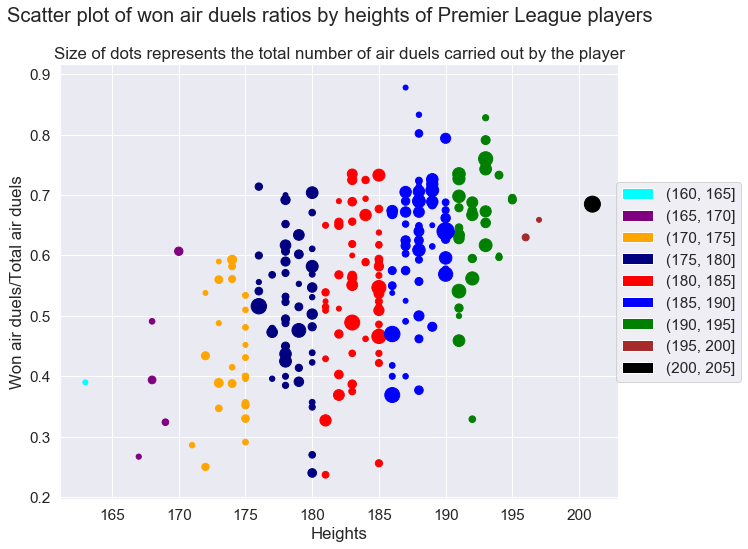

In [177]:
fig = plt.figure()
fig.set_size_inches(10, 8)
sns.set(font_scale=1.4)
bins = range(160, 206 , 5)
df.groupby(pd.cut(df.Height, bins))
colors = ['cyan', 'purple','orange', 'navy', 'red', 'blue', 'green', 'brown', 'black']
plt.scatter(df.Height, df.Rates, s = df.Air_duels*0.6, c = pd.cut(df.Height, bins).cat.codes, cmap = col.ListedColormap(colors))
recs = []
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,df.groupby(pd.cut(df.Height, bins)).indices.keys(),loc="center right", borderaxespad = -8)
plt.title('Size of dots represents the total number of air duels carried out by the player')
plt.suptitle('Scatter plot of won air duels ratios by heights of Premier League players')
plt.xlabel('Heights')
plt.ylabel('Won air duels/Total air duels')
plt.show()

As the plot shows, there's an evident relationship between the height of a player and his success ratio in air duels. Moreover, there's a clear association between the number of total air duels carried out by a player and his height (bigger dots on the right of the plot), meaning that shorter players tend not to engage in air duels, and when they do, they tend to lose them (lower succes ratios on the left side of the plot). The plot also shows that players with heights between 190cm and 195cm are the best at winning air duels on average, with success ratios higher than 60% for more than half of them

# RQ 5 - Bonus

## Validation of the relationship found between height and won air duel ratio with data from other leagues

Now we want to check if the relationship between Height and Won Air Duel Ratio found for Premier league players exists also in other championships. As for RQ 2, this comparison will be executed with the data related to Spain's Liga teams and Italy's Seriq A teams. This choice is made because they are both mediterranean countries, so we might expect that results coming from this datasets might be different from the ones coming from Premier League data. France and Germany are geographically closer to England, so differences might be less pronounced. That's only a personal choice, based on an almost objective consideration about research expectations. If results obtained from this analysis do not differ from the ones coming from Premier league's analysis, then we can infer that the relationship is general and remains valid for all leagues (at least in Europe).

### Basically, the analysis remains the same, so we won't comment the process again. Comments will be made only for the final comparison.

In [12]:
a_teams = pd.DataFrame(team[team.id == '380'])
liga_teams = pd.DataFrame(team[team.id == '724'])
a_teams = pd.DataFrame({'Name' : list(a_teams.officialName), 'ID' : list(a_teams['wyId'])})
liga_teams = pd.DataFrame({'Name' : list(liga_teams.officialName), 'ID' : list(liga_teams['wyId'])})

In [71]:
mydisplay([a_teams.head(), liga_teams.head()])

,Name,ID
0,Società Polisportiva Ars et Labor 2013,3204
1,AC Milan,3157
2,Juventus FC,3159
3,AS Roma,3158
4,US Sassuolo Calcio,3315
,Name,ID
0,Real Club Celta de Vigo,692
1,Reial Club Deportiu Espanyol,691
2,Deportivo Alavés,696
3,Levante UD,695


In [27]:
a_players = players[players.currentTeamId.isin(a_teams.ID)]
a_players = a_players.reset_index().drop('index', axis = 1)

liga_players = players[players.currentTeamId.isin(liga_teams.ID)]
liga_players = liga_players.reset_index().drop('index', axis = 1)

In [28]:
a_heights = pd.DataFrame({'Id' : a_players.wyId, 'Name': a_players.shortName, 'Height' : a_players.height})
a_heights.head()

,Id,Name,Height
0,131184,Ali Adnan,186
1,114,K. Strootman,186
2,122,D. Mertens,169
3,130,S. de Vrij,189
4,174,F. Đuričić,181


In [29]:
liga_heights = pd.DataFrame({'Id' : liga_players.wyId, 'Name': liga_players.shortName, 'Height' : liga_players.height})
liga_heights.head()

,Id,Name,Height
0,32793,A. N'Diaye,187
1,33,J. Cillessen,185
2,99,P. Tytoń,194
3,151,J. Guidetti,185
4,254,R. Rosales,175


In [30]:
ita_events = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\events\events_Italy.json")

In [31]:
spa_events = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\events\events_Spain.json")

In [36]:
a_events = ita_events[ita_events.playerId.isin(a_heights.Id)]
a_events[a_events.subEventName == 'Air duel'].head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
32,1,Duel,90.737589,180423995,2575959,1H,21620,"[{'y': 77, 'x': 52}, {'y': 36, 'x': 32}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",3172
33,1,Duel,90.978934,180423988,2575959,1H,20438,"[{'y': 23, 'x': 48}, {'y': 64, 'x': 68}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",3158
93,1,Duel,282.353177,180424087,2575959,1H,20438,"[{'y': 22, 'x': 47}, {'y': 67, 'x': 83}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",3158
94,1,Duel,282.533675,180424044,2575959,1H,21620,"[{'y': 78, 'x': 53}, {'y': 33, 'x': 17}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",3172
186,1,Duel,551.632194,180424173,2575959,1H,3475,"[{'y': 26, 'x': 34}, {'y': 40, 'x': 30}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",3158


In [37]:
liga_events = spa_events[spa_events.playerId.isin(liga_heights.Id)]
liga_events[liga_events.subEventName == 'Air duel'].head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
74,1,Duel,328.224232,180864470,2565548,1H,274435,"[{'y': 89, 'x': 77}, {'y': 84, 'x': 5}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
101,1,Duel,413.607756,180864654,2565548,1H,247220,"[{'y': 61, 'x': 91}, {'y': 51, 'x': 95}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",695
102,1,Duel,413.727707,180864480,2565548,1H,3277,"[{'y': 39, 'x': 9}, {'y': 49, 'x': 5}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",682
164,1,Duel,691.826623,180864517,2565548,1H,274435,"[{'y': 78, 'x': 63}, {'y': 47, 'x': 73}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
168,1,Duel,720.912005,180864520,2565548,1H,274435,"[{'y': 13, 'x': 64}, {'y': 12, 'x': 71}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682


In [42]:
liga_air_duels = liga_events[liga_events.subEventName == 'Air duel'].reset_index().drop('index', axis = 1)
liga_air_duels.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,1,Duel,328.224232,180864470,2565548,1H,274435,"[{'y': 89, 'x': 77}, {'y': 84, 'x': 5}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
1,1,Duel,413.607756,180864654,2565548,1H,247220,"[{'y': 61, 'x': 91}, {'y': 51, 'x': 95}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",695
2,1,Duel,413.727707,180864480,2565548,1H,3277,"[{'y': 39, 'x': 9}, {'y': 49, 'x': 5}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",682
3,1,Duel,691.826623,180864517,2565548,1H,274435,"[{'y': 78, 'x': 63}, {'y': 47, 'x': 73}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682
4,1,Duel,720.912005,180864520,2565548,1H,274435,"[{'y': 13, 'x': 64}, {'y': 12, 'x': 71}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",682


In [44]:
a_air_duels = a_events[a_events.subEventName == 'Air duel'].reset_index().drop('index', axis = 1)
a_air_duels.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,1,Duel,90.737589,180423995,2575959,1H,21620,"[{'y': 77, 'x': 52}, {'y': 36, 'x': 32}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",3172
1,1,Duel,90.978934,180423988,2575959,1H,20438,"[{'y': 23, 'x': 48}, {'y': 64, 'x': 68}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",3158
2,1,Duel,282.353177,180424087,2575959,1H,20438,"[{'y': 22, 'x': 47}, {'y': 67, 'x': 83}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",3158
3,1,Duel,282.533675,180424044,2575959,1H,21620,"[{'y': 78, 'x': 53}, {'y': 33, 'x': 17}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",3172
4,1,Duel,551.632194,180424173,2575959,1H,3475,"[{'y': 26, 'x': 34}, {'y': 40, 'x': 30}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",3158


In [45]:
a_ad_byplayer = a_air_duels.groupby(a_air_duels.playerId).size()

a_tot_ad = pd.DataFrame({'Id' : a_ad_byplayer.keys(), 'Air_duels' : a_ad_byplayer.values})

In [46]:
liga_ad_byplayer = liga_air_duels.groupby(liga_air_duels.playerId).size()

liga_tot_ad = pd.DataFrame({'Id' : liga_ad_byplayer.keys(), 'Air_duels' : liga_ad_byplayer.values})

In [54]:
a_df = pd.merge(a_heights, a_tot_ad, how='inner')
a_air_duelers = a_df[a_df.Air_duels > 38]
print("Air Duelers: {}".format(len(a_air_duelers)), '\nAir duelers/Total Players: {}'.format(round(len(a_air_duelers)/len(a_df), 3)))

Air Duelers: 231 
Air duelers/Total Players: 0.516


In [55]:
liga_df = pd.merge(liga_heights, liga_tot_ad, how='inner')
liga_air_duelers = liga_df[liga_df.Air_duels > 38]
print("Air Duelers: {}".format(len(liga_air_duelers)), '\nAir duelers/Total Players: {}'.format(round(len(liga_air_duelers)/len(liga_df), 3)))

Air Duelers: 243 
Air duelers/Total Players: 0.534


In [57]:
a_won_airduels = a_air_duels[[{'id': 1801} in a_air_duels.tags[i] for i in range(len(a_air_duels))]]

a_won_byplayer = a_won_airduels.groupby(a_won_airduels.playerId).size()
a_won_ad = pd.DataFrame({'Id' : a_won_byplayer.keys(), 'Won_duels' : a_won_byplayer.values})

In [58]:
liga_won_airduels = liga_air_duels[[{'id': 1801} in liga_air_duels.tags[i] for i in range(len(liga_air_duels))]]

liga_won_byplayer = liga_won_airduels.groupby(liga_won_airduels.playerId).size()
liga_won_ad = pd.DataFrame({'Id' : liga_won_byplayer.keys(), 'Won_duels' : liga_won_byplayer.values})

## La Liga

In [68]:
liga_df = pd.merge(liga_air_duelers, liga_won_ad, how='inner')
liga_df['Rates'] =  round(liga_df.Won_duels/liga_df.Air_duels, 3)
mydisplay([liga_df.sort_values(by = 'Rates', ascending=False).head(),
        liga_df.sort_values(by = 'Won_duels', ascending=False).head()], names = ['<strong>''First 5 players by won air duels Rates', '<strong>''First 5 players by won air duels'])

First 5 players by won air duels Rates First 5 players by won air duels 
 
 
 
 Id 
 Name 
 Height 
 Air_duels 
 Won_duels 
 Rates 
 
 
 
 
 223 
 125250 
 Ó. Duarte 
 186 
 57 
 45 
 0.789 
 
 
 142 
 7302 
 Albentosa 
 192 
 78 
 61 
 0.782 
 
 
 25 
 3335 
 Bartra 
 184 
 81 
 63 
 0.778 
 
 
 20 
 3309 
 R. Varane 
 191 
 100 
 77 
 0.770 
 
 
 186 
 3341 
 Piqué 
 194 
 122 
 93 
 0.762 
 
 
 
 
 
 
 Id 
 Name 
 Height 
 Air_duels 
 Won_duels 
 Rates 
 
 
 
 
 47 
 3503 
 Raúl García 
 184 
 278 
 185 
 0.665 
 
 
 56 
 3605 
 Jorge Molina 
 188 
 333 
 167 
 0.502 
 
 
 240 
 228902 
 J. Calleri 
 173 
 310 
 165 
 0.532 
 
 
 69 
 3714 
 C. Stuani 
 184 
 316 
 161 
 0.509 
 
 
 127 
 5400 
 Gerard Moreno 
 180 
 332 
 159 
 0.479

## Serie A

In [70]:
a_df = pd.merge(a_air_duelers, a_won_ad, how='inner')
a_df['Rates'] =  round(a_df.Won_duels/a_df.Air_duels, 3)
mydisplay([a_df.sort_values(by = 'Rates', ascending=False).head(),
        a_df.sort_values(by = 'Won_duels', ascending=False).head()], names = ['<strong>''First 5 players by won air duels Rates', '<strong>''First 5 players by won air duels'])

First 5 players by won air duels Rates First 5 players by won air duels 
 
 
 
 Id 
 Name 
 Height 
 Air_duels 
 Won_duels 
 Rates 
 
 
 
 
 23 
 3463 
 F. Fazio 
 195 
 232 
 196 
 0.845 
 
 
 44 
 7858 
 B. Sagna 
 176 
 42 
 34 
 0.810 
 
 
 211 
 25849 
 F. Ghoulam 
 188 
 40 
 32 
 0.800 
 
 
 121 
 20635 
 F. Acerbi 
 192 
 169 
 131 
 0.775 
 
 
 129 
 20723 
 B. Salamon 
 196 
 82 
 63 
 0.768 
 
 
 
 
 
 
 Id 
 Name 
 Height 
 Air_duels 
 Won_duels 
 Rates 
 
 
 
 
 191 
 22933 
 L. Pavoletti 
 188 
 430 
 251 
 0.584 
 
 
 23 
 3463 
 F. Fazio 
 195 
 232 
 196 
 0.845 
 
 
 51 
 8327 
 E. Džeko 
 193 
 227 
 149 
 0.656 
 
 
 181 
 22163 
 S. Missiroli 
 191 
 243 
 147 
 0.605 
 
 
 133 
 86328 
 G. Pezzella 
 186 
 192 
 140 
 0.729

Serie A player Fazio is a solid air dueler, given that he covers first place in rate of won air duels sorted dataframe and the second place in the total number of won air duels sorted dataframe. This means that he engages in many air duels, and wins most of them. No other player in the other two leagues had such solid results, but that's not crucial to our analysis. It is worth to note that he is very tall too, with a well over the average height of 195cm. This gives us a hint that his height conditions his results in air duels, suggesting that the relationship between height and won air duels still exists outside the Britannic borders.

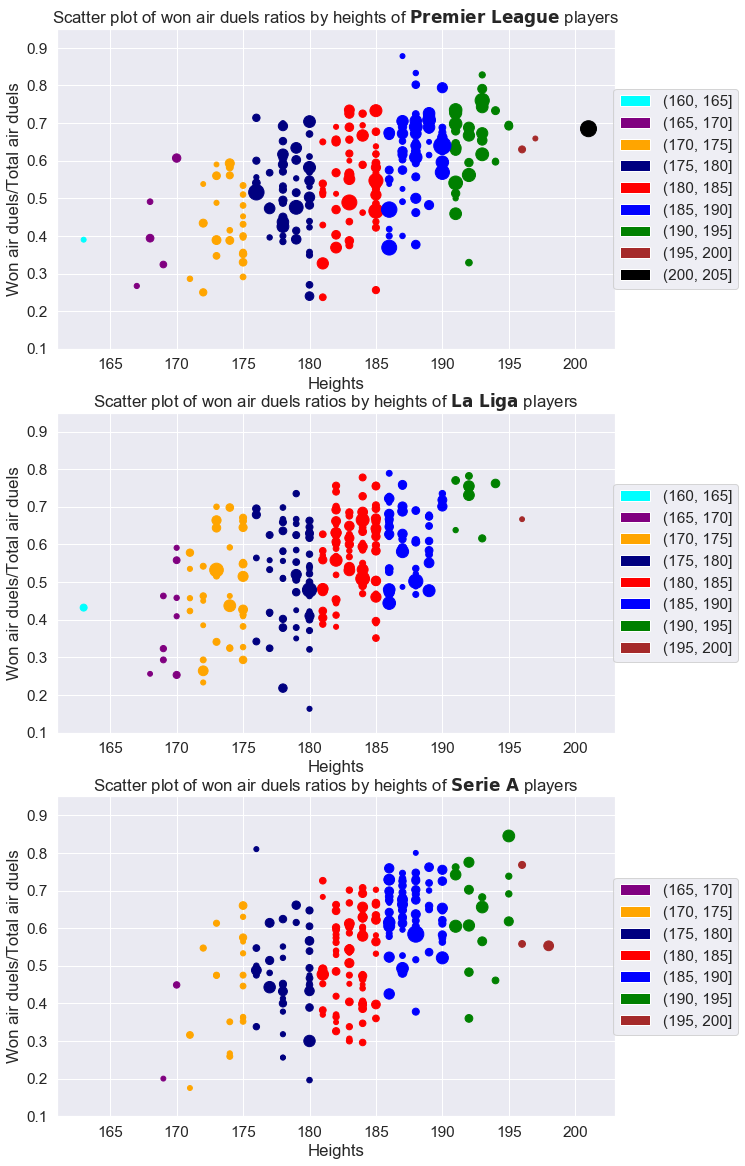

In [120]:
fig = plt.figure()
fig.set_size_inches(10, 20)
sns.set(font_scale=1.4)
bins = range(160, 206 , 5)

ax = fig.add_subplot(3,1,1)
pl_df.groupby(pd.cut(pl_df.Height, bins))
colors = ['cyan', 'purple','orange', 'navy', 'red', 'blue', 'green', 'brown', 'black']
plt.scatter(pl_df.Height, pl_df.Rates, s = pl_df.Air_duels*0.6, c = pd.cut(pl_df.Height, bins).cat.codes, cmap = col.ListedColormap(colors))
recs = []
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,pl_df.groupby(pd.cut(pl_df.Height, bins)).indices.keys(),loc="center right", borderaxespad = -8)
plt.title('Scatter plot of won air duels ratios by heights of '+ r"$\bf{Premier\ League}$" + ' players')
plt.xlabel('Heights')
plt.ylabel('Won air duels/Total air duels')
plt.xlim([161,203])
plt.ylim([0.1, 0.95])

ax = fig.add_subplot(3,1,2)
liga_df.groupby(pd.cut(liga_df.Height, bins))
colors = ['cyan', 'purple','orange', 'navy', 'red', 'blue', 'green', 'brown']
plt.scatter(liga_df.Height, liga_df.Rates, s = liga_df.Air_duels*0.6, c = pd.cut(liga_df.Height, bins).cat.codes, cmap = col.ListedColormap(colors))
recs = []
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,liga_df.groupby(pd.cut(liga_df.Height, bins)).indices.keys(),loc="center right", borderaxespad = -8)
plt.title('Scatter plot of won air duels ratios by heights of '+ r"$\bf{La\ Liga}$" + ' players')
plt.xlabel('Heights')
plt.ylabel('Won air duels/Total air duels')
plt.xlim([161,203])
plt.ylim([0.1, 0.95])

ax = fig.add_subplot(3,1,3)
a_df.groupby(pd.cut(a_df.Height, bins))
colors = ['purple','orange', 'navy', 'red', 'blue', 'green', 'brown']
plt.scatter(a_df.Height, a_df.Rates, s = a_df.Air_duels*0.6, c = pd.cut(a_df.Height, bins).cat.codes, cmap = col.ListedColormap(colors))
recs = []
for i in range(len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,a_df.groupby(pd.cut(a_df.Height, bins[1:])).indices.keys(),loc="center right", borderaxespad = -8)
plt.title('Scatter plot of won air duels ratios by heights of '+ r"$\bf{Serie\ A}$" + ' players')
plt.xlabel('Heights')
plt.ylabel('Won air duels/Total air duels')
plt.xlim([161,203])
plt.ylim([0.1, 0.95])
plt.show()

### The three plots confirm the relationship that was found for Premier League players, with almost the same results. The "best" height class is confirmed to be (190, 195], that contains players who are better in average at air duels than players in other height classes. Also, the size of the dots shows again that the number of total air duels engaged by a player is dependent with his height, although this relationship is not strong For La Liga players. In fact, in that plot appears to be another class of players often engaging air duels, which is the yellow one (between 170 and 175cm). That class is not particularly strong in the other two leagues, so it must be a peculiar feature of the Spanish first division. This doesn't affect our conclusions about the rate of won air duels, which is confirmed to be in a strong relationship with the height of a player. 

# [RQ 6]

In [1]:
import datetime as DT
import io
import numpy as np
import json
import pandas as pd
import requests
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
players=pd.read_json(r'C:\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw2\players.json')
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


In [3]:
#Dropping unnecessary columns
players_imp=players.drop(columns=['passportArea','weight','firstName','middleName','lastName','currentTeamId','height','role','birthArea','wyId','foot','currentNationalTeamId'])
players_imp
players_shortname=players_imp.drop(columns=['birthDate'])
players_shortname

,shortName
0,H. Tekin
1,M. Sarr
2,O. Mandanda
3,A. N'Diaye
4,I. Konat\u00e9
...,...
3598,A. Ma\u00e2loul
3599,C. C\u00e1ceda
3600,M. Araujo
3601,A. Tagnaouti


In [4]:
players_imp

,birthDate,shortName
0,1989-06-17,H. Tekin
1,1999-01-23,M. Sarr
2,1998-10-26,O. Mandanda
3,1990-03-06,A. N'Diaye
4,1999-05-25,I. Konat\u00e9
...,...,...
3598,1990-01-01,A. Ma\u00e2loul
3599,1991-09-27,C. C\u00e1ceda
3600,1994-10-24,M. Araujo
3601,1996-04-05,A. Tagnaouti


In [5]:
# calculating age of the players
import datetime as DT
players_imp['age']=pd.to_datetime(players_imp['birthDate'], errors='coerce')
now = pd.to_datetime('now')
now=(now - players_imp['age']).astype('<m8[Y]') 
age=now.astype(int)
age=pd.DataFrame(age)
age

,age
0,30
1,20
2,21
3,29
4,20
...,...
3598,29
3599,28
3600,25
3601,23


In [6]:
players_age=pd.concat([players_shortname,age],axis=1)
players_age

,shortName,age
0,H. Tekin,30
1,M. Sarr,20
2,O. Mandanda,21
3,A. N'Diaye,29
4,I. Konat\u00e9,20
...,...,...
3598,A. Ma\u00e2loul,29
3599,C. C\u00e1ceda,28
3600,M. Araujo,25
3601,A. Tagnaouti,23


#### Calculating the median age of the players

In [7]:
med_age=players_age.age.median()
med_age

27.0

#### Boxplot visualization

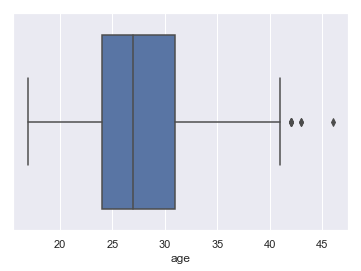

In [8]:
sns.set(style="darkgrid")
boxplot = sns.boxplot(x="age", data=players_age)
boxplot

#### Frequency of players with different ages

In [9]:
table_freq=players_age.groupby('age').size()
#table-freq=table_freq.reset_index(drop=True)
df= pd.DataFrame(table_freq)
serial_no=list(range(14))
df=df.reset_index()
df.columns=['age','frequency']
df.head()

,age,frequency
0,17,3
1,18,19
2,19,64
3,20,150
4,21,188


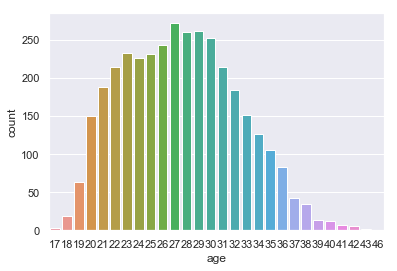

In [10]:
sns.set(style="darkgrid")
ax = sns.countplot(x="age", data=players_age)
plt.show()

In [11]:
player_eff=pd.read_json(r'C:\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw2\final_player_ratio.json')
player_eff


,birthDate,PlayerId,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1989-03-02,36,T. Alderweireld,598,0.665924,898
1,1987-04-24,48,J. Vertonghen,1129,0.476371,2370
2,1992-02-14,54,C. Eriksen,869,0.395719,2196
3,1993-07-28,8717,H. Kane,246,0.414141,594
4,1990-09-19,8945,K. Trippier,601,0.458429,1311
...,...,...,...,...,...,...
236,1988-07-11,25798,E. Capoue,196,0.236429,829
237,1991-02-02,3351,Kiko Femen\u00eda,547,0.649644,842
238,1989-07-22,160,D. Janmaat,161,0.195864,822
239,1989-08-12,7929,T. Cleverley,830,0.767808,1081


In [12]:
player_ex_dob=player_eff.drop(columns=['birthDate'])
player_ex_dob

,PlayerId,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,36,T. Alderweireld,598,0.665924,898
1,48,J. Vertonghen,1129,0.476371,2370
2,54,C. Eriksen,869,0.395719,2196
3,8717,H. Kane,246,0.414141,594
4,8945,K. Trippier,601,0.458429,1311
...,...,...,...,...,...
236,25798,E. Capoue,196,0.236429,829
237,3351,Kiko Femen\u00eda,547,0.649644,842
238,160,D. Janmaat,161,0.195864,822
239,7929,T. Cleverley,830,0.767808,1081


In [13]:
player_eff['age'] = pd.to_datetime(player_eff['birthDate'], errors='coerce')
now = pd.to_datetime('now')
now=(now - player_eff['age']).astype('<m8[Y]') 
age=now.astype(int)
age=pd.DataFrame(age)
age

,age
0,30
1,32
2,27
3,26
4,29
...,...
236,31
237,28
238,30
239,30


In [14]:
players_age_eff=pd.concat([player_ex_dob,age],axis=1).drop(columns=['Efficiency'])
players_age_eff

,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber,age
0,36,T. Alderweireld,598,898,30
1,48,J. Vertonghen,1129,2370,32
2,54,C. Eriksen,869,2196,27
3,8717,H. Kane,246,594,26
4,8945,K. Trippier,601,1311,29
...,...,...,...,...,...
236,25798,E. Capoue,196,829,31
237,3351,Kiko Femen\u00eda,547,842,28
238,160,D. Janmaat,161,822,30
239,7929,T. Cleverley,830,1081,30


# Research Question: Does age group influence acuracy:

#### dividing the player with respect to the age groups

In [15]:
# Age group 20.5-25.5
table1= players_age_eff.query('20.5<=age<=25.5')
table1.head()

,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber,age
6,210044,E. Dier,1073,2147,25
7,13484,D. Alli,451,1184,23
11,240070,H. Winks,568,628,23
12,257762,D. S\u00e1nchez,617,1803,23
46,247248,S. March,336,689,25


In [16]:
# Age group 25.5-30.5
table2=players_age_eff.query('25.5<=age<=30.5')
table2

,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber,age
0,36,T. Alderweireld,598,898,30
2,54,C. Eriksen,869,2196,27
3,8717,H. Kane,246,594,26
4,8945,K. Trippier,601,1311,29
8,14911,Son Heung-Min,363,938,27
...,...,...,...,...,...
232,20593,R. Pereyra,248,682,28
237,3351,Kiko Femen\u00eda,547,842,28
238,160,D. Janmaat,161,822,30
239,7929,T. Cleverley,830,1081,30


In [17]:
# Age group 30.5-35.5
table3=players_age_eff.query('30.5<=age<=35.5')
table3.head()

,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber,age
1,48,J. Vertonghen,1129,2370,32
5,11152,M. Demb\u00e9l\u00e9,558,1365,32
9,25381,H. Lloris,347,815,32
18,8433,S. Ward,412,999,34
21,70092,S. Defour,684,1019,31


In [18]:
s11=table1['AccuratePassesNumber'].sum()
s12=table1['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 20.5-25.5
s13=s12-s11
#The list contains total number of inaccurate passes and inaccurate passes
L1=list([round(s11/len(table1)),round(s13/len(table1))])
L1

[401.0, 579.0]

In [19]:
s21=table2['AccuratePassesNumber'].sum()
s22=table2['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 25.5-30.5
s23=s22-s21
#The list contains total number of inaccurate passes and inaccurate passes
L2=list([round(s21/len(table2)),round(s23/len(table2))])
L2

[475.0, 633.0]

In [20]:
s31=table3['AccuratePassesNumber'].sum()
s32=table3['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 30.5-35.5
s33=s32-s31
#The list contains total number of inaccurate passes and inaccurate passes
L3=list([round(s31/len(table3)),round(s33/len(table3))])
L3

[551.0, 617.0]

In [21]:
table=[L1,L2,L3]
table

[[401.0, 579.0], [475.0, 633.0], [551.0, 617.0]]

In [22]:
# Generating the contingency table
data = [['20.5-25.5', *L1], ['25.5-30.5', *L2], ['30.5-35.5', *L3]] 
df_data = pd.DataFrame(data, columns = ['Age_group', 'Average accurate passes','Average inaccurate passes'])
df_data = df_data.set_index(df_data.Age_group).drop('Age_group', axis = 1)

### Chi-Squared Test 
A chi-squared test with significance level $\alpha = 0.05$ will now be performed on the above contingency table.

H0 : The null Hypothesis is that there's no statistically significant relationship between age of the players and the efficiency of the players 

H1: The alternative hypotesis is that there's significant relationship between age of the players and the efficiency of the players.

In [23]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
[[429.502457  550.497543 ]
 [485.6007371 622.3992629]
 [511.8968059 656.1031941]]
probability=0.950, critical=5.991, stat=9.097
Dependent (reject H0)
significance=0.050, p=0.011
Dependent (reject H0)


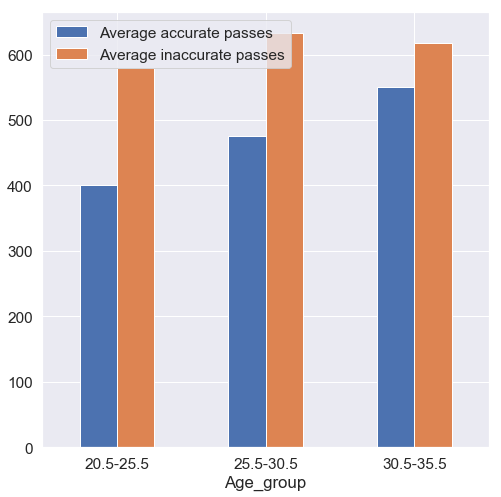

In [24]:
sns.set(font_scale=1.4)
df_data.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
plt.xticks(rotation=0)
plt.show()

#### Consider the level of significance $\alpha$ be 0.05. From the chi square test, we observe that the p-value is 0.001. Which is indeed less than the level of significance $\alpha$. As, $p<\alpha$, we reject the null hypothesis and can claim that there is significant statistical relationship between the age of a player and his efficiency. In particular, the barplot shows that accuracy increases with age, suggesting that years of experience influence the accuracy of players.

# CRQ1

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

CRQ1 was performed over premier league

In [103]:
df = pd.read_json('events_England.json')

### Cleaning data

Informetion about goals is stored in de column 'tags', the element stored them are lists of dictionaries. In order to performe our analisy we break the list and than we break the dictionary.

In [104]:
df.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


In [105]:
df = pd.concat([df,pd.DataFrame(list(df['tags']))],axis = 1).drop('tags',axis = 1)  # breack the lists inside a tags column

df = df.rename(columns = {0: 'tag0', 1: 'tag1', 2: 'tag2', 3: 'tag3', 4: 'tag4', 5: 'tag5'}) #rename the new columns

#information about goals is stored in column 'tag0', so i remove the columns 'tag1' and above
for value in df.columns[12:]:       
    df = df.drop(value, axis = 1)

# Now some elements are setted as None, i replace it with the value 0 than i drop thata row
df = df.replace([None], 0)   # replacement
df = df[(df.tag0 != 0)]   # drop row
df = df.reset_index(drop = True)

# te elements of column 'tag0' are dictionarie {'id': tag_value}. break it mean create a new column named 'id'.
# There is already a column called 'id', where are stored unique value that identify the events. 
# We change its name to 'unicEventId'
df = df.rename(columns = {'id': 'unicEventId' }) 

df = pd.concat([df, pd.DataFrame(list(df.tag0))], axis = 1).drop('tag0', axis = 1) # breack the dictionaries

In [106]:
df.head()

,eventId,eventName,eventSec,unicEventId,matchId,matchPeriod,playerId,positions,subEventId,subEventName,teamId,id
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,1609,1801
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,1609,1801
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,1609,1801
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,1609,1801
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,1609,1801


### barplot with the absolute frequency of goals in all the time slots.

Now we can select all the goal events, they are cassifide with 'id' = 101. Every goals is stored doubles in the dataframe, becouse of a single goal event is seen by point of view of the goal keeper and the attaker. If the goal keeper performe a save attempt  and fail it,  its a goal. This event is stored with 'id' = 101 and 'eventId' = 9

In [107]:
# we create two data frame, one for the first half and another for the second half.
# H1_Goals stored all the goal during the first half of the match, cleaned from the doubles. Similary for H2_Goals

H1_Goals = df[(df.id == 101) & (df.eventId != 9) & (df.matchPeriod == '1H')] 
H2_Goals = df[(df.id == 101) & (df.eventId != 9) & (df.matchPeriod == '2H')]

H1 = []  # will be stored all goals performed in each intervals
for i in range(5):
    # count the goals performed in each interval
    H1.append(len(H1_Goals[(H1_Goals.eventSec >= i*60*9) & (H1_Goals.eventSec < (i+1)*60*9)])) 
    
H1.append(len(H1_Goals[H1_Goals.eventSec >= 45*60])) # count the goal performed during the stoppage time


H2 = [] # similary to H1
for i in range(5):
    # count the goals performed in each interval
    H2.append(len(H2_Goals[(H2_Goals.eventSec >= i*60*9) & (H2_Goals.eventSec < (i+1)*60*9)])) 
    
H2.append(len(H2_Goals[H2_Goals.eventSec >= 45*60])) # count the goal performed during the stoppage time

we make a double bar plot in order to compare the Goals performed during each half time

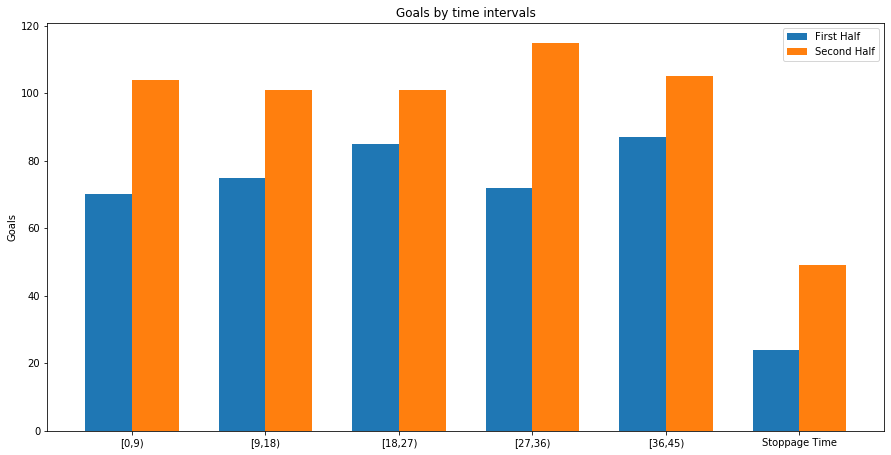

In [108]:
# The plot
labels = ['[0,9)', '[9,18)', '[18,27)', '[27,36)', '[36,45)', 'Stoppage Time']
w = 0.35

plot = plt.subplot()
fig =plt.gcf()
fig.set_size_inches(15, 7.5)
plot1 = plot.bar(np.arange(len(labels)) - w/2 , H1, w, label = 'First Half')
plot2 = plot.bar(np.arange(len(labels)) + w/2 , H2, w, label = 'Second Half')

plot.set_ylabel('Goals')
plot.set_title('Goals by time intervals')
plot.set_xticks(np.arange(len(labels)))
plot.set_xticklabels(labels)
plot.legend()

### Find the top 10 teams that score the most in the interval "81-90"

In order to finde the top 10 team who score the mosts in the interva [81-90], we select all the goals that fall in this amount of  time from 'H2_Goals', and we store it in a new data frame called 'interva'. After calculate the ammount of goal performed by a team we stor it and the team id in a new dataframe called 'scores'.

In [109]:
interval = H2_Goals[(H2_Goals['eventSec'] >= 60*36) & (H2_Goals['eventSec'] <= 60*45)]

scores = pd.DataFrame() # will be store the team id and the number of goals performed
Teams = pd.read_json('../teams.json')

for value in set(interval.teamId):
    team = list(Teams[Teams.wyId == value].name)[0]
    # we store the team id, the team name, and its score 
    scores = pd.concat([scores, pd.DataFrame([[value, team, len(interval[interval.teamId == value])]])], axis = 0)
    
scores = scores.rename(columns = {0: 'teamId', 1: 'Team', 2 : 'Goals'}) 
scores = scores.sort_values(['Goals'], ascending= False) # we organize the team in descending order
scores = scores.reset_index(drop = True)

In [110]:
scores[:10] # we print the top 10 teams that score the most in the interval "81-90"

,teamId,Team,Goals
0,1625,Manchester City,13
1,1609,Arsenal,11
2,1610,Chelsea,9
3,1611,Manchester United,9
4,1612,Liverpool,7
5,1644,Watford,7
6,1628,Crystal Palace,7
7,1633,West Ham United,6
8,1624,Tottenham Hotspur,5
9,1659,AFC Bournemouth,5


### Show if there are players that were able to score at least one goal in 8 different intervals

We collect the id of the players who performed goals in a set. We scroll throu the set and for each player whe caount in how many intervals he performed a goal, if the number of intervals is eight or above we score the value and the player id in a dataframe called Players  

In [111]:
Players = pd.DataFrame() # will be stored the player 

all_Team = set(df[(df.id == 101) & (df.eventId != 9)].playerId) # are stored the id of the player who performed a goal
all_Players = pd.read_json('../players.json')

for value in all_Team:
    
    Ser1 = H1_Goals[H1_Goals.playerId == value] # the goal performed by a player during the first half
    Ser2 = H2_Goals[H2_Goals.playerId == value] # the goal performed by a player during the second half
    
    count = 0 # counter of the number of intervals of time in wich goals are performend by the player
     
    for i in range(5):
        
        if len(Ser1[(Ser1.eventSec >= i*60*9) & (Ser1.eventSec < (i + 1)*60*9)]) != 0: # check the first half
            count += 1
        if len(Ser2[(Ser2.eventSec >= i*60*9) & (Ser2.eventSec < (i + 1)*60*9)]) != 0: # check the second half
            count += 1
    if any(Ser1.eventSec > 45*60): # check the first half (stoppage time)
        count += 1
    if any(Ser2.eventSec > 45*60): # check the second half (stoppage time)
        count += 1
    if count >= 8:                                          # we replace the special character
        player_name = list(all_Players[all_Players.wyId == value].shortName)[0].encode('ascii').decode('unicode escape')
        Players = pd.concat([Players, pd.DataFrame([[value, player_name, count]])], axis = 0) #store the player id and its name
                            
Players = Players.rename(columns = {0 : 'playerId', 1 : 'shortName', 2: 'Goals'})
Players = Players.sort_values('Goals', ascending = False)
Players = Players.reset_index(drop = True)

In [112]:
Players # we print players that were able to score at least one goal in 8 different intervals

,playerId,shortName,Goals
0,8717,H. Kane,11
1,12829,J. Vardy,11
2,120353,Mohamed Salah,11
3,11066,R. Sterling,11
4,26150,R. Mahrez,9
5,7905,R. Lukaku,9
6,3324,Álvaro Morata,9
7,340386,Gabriel Jesus,9
8,8422,W. Zaha,8
9,25413,A. Lacazette,8


# CRQ 2

To visualize movements and passes of a player on the pitch, I will take the code for drawing a football pitch from **[Towards Data Science](https://towardsdatascience.com/advanced-sports-visualization-with-pandas-matplotlib-and-seaborn-9c16df80a81b)**, and apply some small changes to enhance the result

In [48]:

def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = True, color = (0.3, 1, 0, .2))
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False, color = 'white')
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False, color = 'white')
    midline = ConnectionPatch([60,0], [60,80], "data", "data",  color = 'white')

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False, color = 'white')
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False, color = 'white')


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="white", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="white")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="white")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="white")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="white")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="white")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

In [49]:
events = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\events\events_Spain.json")
events = events.drop(['eventSec', 'id', 'matchPeriod', 'subEventId', 'subEventName', 'teamId'], axis = 1)

In [50]:
Spa_match = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\matches\matches_Spain.json")

Retrieving the match on which we want to elaborate the analysis from the dpsin mstches database. We need the match wyId to retrieve corresponding event information from the events database

In [51]:
Spa_match[Spa_match.label == 'Barcelona - Real Madrid, 2 - 2']

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
23,795,"May 6, 2018 at 8:45:00 PM GMT+2",2018-05-06 18:45:00,Regular,36,"Barcelona - Real Madrid, 2 - 2","[{'refereeId': 378950, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",Camp Nou,0,2565907


In [52]:
match_Id = Spa_match[Spa_match.label == 'Barcelona - Real Madrid, 2 - 2'].wyId.iloc[0]

In [53]:
Bar_ReM = events[events.matchId == match_Id]

In [54]:
Bar_ReM.head()

,eventId,eventName,matchId,playerId,positions,tags
593455,8,Pass,2565907,3321,"[{'y': 49, 'x': 50}, {'y': 40, 'x': 37}]",[{'id': 1801}]
593456,8,Pass,2565907,14723,"[{'y': 40, 'x': 37}, {'y': 23, 'x': 30}]",[{'id': 1801}]
593457,8,Pass,2565907,3306,"[{'y': 23, 'x': 30}, {'y': 57, 'x': 26}]",[{'id': 1801}]
593458,8,Pass,2565907,3309,"[{'y': 57, 'x': 26}, {'y': 40, 'x': 8}]",[{'id': 1801}]
593459,8,Pass,2565907,3915,"[{'y': 40, 'x': 8}, {'y': 14, 'x': 11}]",[{'id': 1801}]


We want to visualize with a heatmap the activity areas of Cristiano Ronaldo and Lionel Messi on the pitch during this match, so we need to retrieve their player Id's.

In [55]:
players = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\players.json")

To be sure to find them, we'll search the database by their last names, which I found on Wikipedia.

In [56]:
# Messi
players[players.lastName == 'Messi Cuccittini']

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
207,"{'name': 'Argentina', 'id': '32', 'alpha3code'...",1987-06-24,12274,676,Lionel Andr\u00e9s,left,170,Messi Cuccittini,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",L. Messi,72,3359


In [57]:
# Ronaldo
players[players.lastName == 'dos Santos Aveiro']

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
185,"{'name': 'Portugal', 'id': '620', 'alpha3code'...",1985-02-05,9905,3159,Cristiano Ronaldo,right,187,dos Santos Aveiro,,"{'name': 'Portugal', 'id': '620', 'alpha3code'...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",Cristiano Ronaldo,83,3322


## Ronaldo

In [58]:
Ron = players[players.lastName == 'dos Santos Aveiro'].wyId.iloc[0]

Extracting the activity information related to Ronaldo from the Events database

In [59]:
Ron_ev = Bar_ReM[Bar_ReM.playerId == Ron]

Of all the events, we only want to select passes, shoots, duels and free kicks

In [60]:
Ron_act = Ron_ev[Ron_ev.eventName.isin(['Pass', 'Shot', 'Duel', 'Free Kick'])]

In [61]:
Ron_act.head()

,eventId,eventName,matchId,playerId,positions,tags
593473,1,Duel,2565907,3322,"[{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]","[{'id': 702}, {'id': 1801}]"
593475,1,Duel,2565907,3322,"[{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]","[{'id': 701}, {'id': 1802}]"
593497,1,Duel,2565907,3322,"[{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]","[{'id': 701}, {'id': 1802}]"
593552,1,Duel,2565907,3322,"[{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]","[{'id': 502}, {'id': 703}, {'id': 1801}]"
593554,8,Pass,2565907,3322,"[{'y': 8, 'x': 97}, {'y': 100, 'x': 100}]","[{'id': 401}, {'id': 801}, {'id': 1802}]"


With a quick glance, we see that the position indicators have two coordinates (x,y), both ranging between 0 and 100. Since length and width of a football pitch should be different, and in our scaled-down version of the pitch we have set the width $"x"$ (long edge) at 120, and the heigth $"y"$ (short edge) at 80, position coordinates from the dataframe must be rescaled.

Moreover, since we have two position values for each event, i.e. the starting and ending point, we must select only the first values, because those are the positions of the player during the game. 

In [62]:
Ron_pos = Ron_act.positions

In [63]:
Ron_pos = [Ron_pos.iloc[i][0] for i in range(len(Ron_pos))]

Assigning $"y"$ and $"x"$ coordinates to two different lists, and rescaling values as above said.

In [64]:
y_coord_Ron = [Ron_pos[i]['y']*80/100 for i in range(len(Ron_pos))]

In [65]:
x_coord_Ron = [Ron_pos[i]['x']*120/100 for i in range(len(Ron_pos))]

In [66]:
pd.DataFrame({'y': y_coord_Ron, 'x': x_coord_Ron}).head()

,y,x
0,15.2,58.8
1,13.6,58.8
2,10.4,78.0
3,9.6,111.6
4,6.4,116.4


### Plotting the heatmap

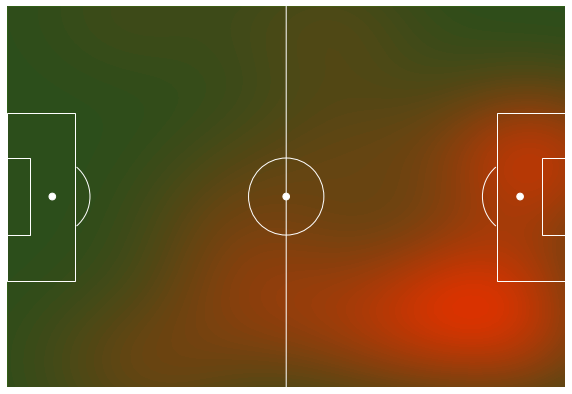

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.kdeplot(x_coord_Ron, y_coord_Ron,  cmap = sns.dark_palette("red", as_cmap = True),  n_levels=60, shade=True)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.show()
plt.close()

#### The heatmap shows that Ronaldo was active mostly on the right wing and in front of the net

## Messi

In [68]:
Mes = players[players.lastName == 'Messi Cuccittini'].wyId.iloc[0]

Extracting the activity information related to Messi from the Events database

In [69]:
Mes_ev = Bar_ReM[Bar_ReM.playerId == Mes]

Of all the events, we only want to select passes, shoots, duels and free kicks

In [70]:
Mes_act = Mes_ev[Mes_ev.eventName.isin(['Pass', 'Shot', 'Duel', 'Free Kick'])]

Same as above, we must rescale the coordinates and select only the first values in Positions, to have the positions of Messi on our pitch.

In [74]:
Mes_pos = Mes_act.positions
Mes_pos = [Mes_pos.iloc[i][0] for i in range(len(Mes_pos))]

y_coord_Mes = [Mes_pos[i]['y']*80/100 for i in range(len(Mes_pos))]

x_coord_Mes = [Mes_pos[i]['x']*120/100 for i in range(len(Mes_pos))]

pd.DataFrame({'y': y_coord_Mes, 'x': x_coord_Mes}).tail()

,y,x
87,60.8,100.8
88,57.6,115.2
89,66.4,52.8
90,6.4,52.8
91,37.6,46.8


Messi has accomplished more than twice the actions of Cristiano Ronaldo. Good job, Leo!

### Plotting the heatmap

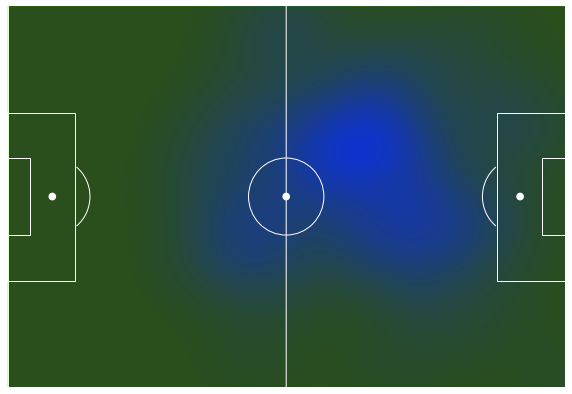

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.kdeplot(x_coord_Mes, y_coord_Mes,  cmap = sns.dark_palette("blue", as_cmap = True),  n_levels= 60, shade=True, cut = 5)
draw_pitch(ax)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.show()
plt.close(fig)

#### The heatmap shows that Messi was active mostly at the center and in central area of the opponent's half of the pitch.

## Mes-aldo






Heatmap of both players. To obtain it, we must reverse the coordinates of one of the players, so that they fall in the right half of the pitch. Ronaldo's coordinates will be reversed.

In [76]:
xRon = [120 - i for i in x_coord_Ron]
yRon = [80 - i for i in y_coord_Ron]

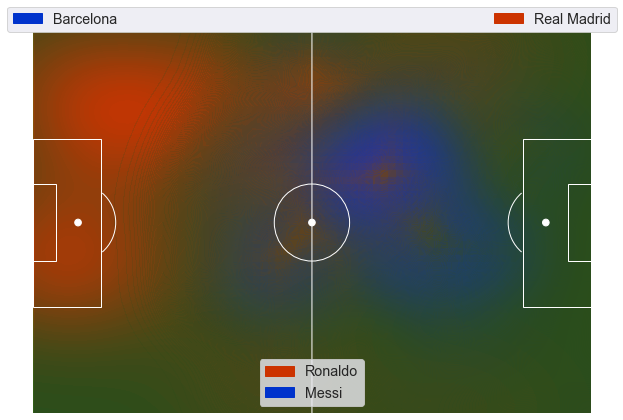

In [77]:

fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.kdeplot(xRon, yRon,  cmap = sns.dark_palette("red", as_cmap = True),  n_levels= 50, shade=True, alpha = 1)
sns.kdeplot(x_coord_Mes, y_coord_Mes,  cmap = sns.dark_palette("blue", as_cmap = True),  n_levels= 800, shade=True, cut = 5, alpha = 0.15)
draw_pitch(ax)
sns.set(font_scale=1.3)
leg1 = plt.legend(handles=[mpatches.Patch(color= (.8,.2,0), label='Ronaldo'), mpatches.Patch(color= (0, .2, .8), label='Messi')], loc = 'lower center')
ax = plt.gca().add_artist(leg1)
plt.legend(handles = [mpatches.Patch(color= (0,.2,.8), label='Barcelona'),mpatches.Patch(color= (.8,.2,0), label='Real Madrid')], loc='upper left',
           ncol=2, mode="expand", borderaxespad=-1.8)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.show()
plt.close(fig)


#### As this map shows, Ronaldo's positions are mostly offensive, and almost equally divided between the right wing and the the front of the net. Messi's positions, on the other hand, are mostly central and cover uniformly the  central zone of the opponent's half of the pitch. 

## Juventus - Napoli

In [78]:
Ita_events = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\events\events_Italy.json")
Ita_events = Ita_events.drop(['eventSec', 'id', 'matchPeriod', 'subEventId', 'subEventName', 'teamId'], axis = 1)

In [79]:
Ita_match = pd.read_json(r"C:\Users\simon\Desktop\ADM\ADM Homework 2\matches\matches_Italy.json")

Now we want to visualize passes made by Jorginho and Pjanic during the match Juventus-Napoli through a map of arrows.

In [80]:
Ita_match = Ita_match[Ita_match.label == 'Juventus - Napoli, 0 - 1']

With its wyId we can now retrieve the events related to this match

In [81]:
imatch_Id = Ita_match.wyId.iloc[0]

In [82]:
Juv_Nap = Ita_events[Ita_events.matchId == imatch_Id]

Retrieving playerId's for Jorginho and Pjanic.

In [83]:
players[players.lastName == 'Frello Filho']

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1658,"{'name': 'Brazil', 'id': '76', 'alpha3code': '...",1991-12-20,3757,3187,Jorge Luiz,right,180,Frello Filho,,"{'name': 'Italy', 'id': '380', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",Jorginho,65,21315


Problem with the encoding of the database characters didn't make possible to find Pjanic through his last name, so we use his first name Miralem, which is luckily quite uncommon.

In [84]:
players[players.firstName == 'Miralem']

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1482,"{'name': 'Bosnia-Herzegovina', 'id': '70', 'al...",1990-04-02,null,3159,Miralem,right,180,Pjani\u0107,,"{'name': 'Luxembourg', 'id': '442', 'alpha3cod...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",M. Pjani\u0107,74,20443


In [85]:
Pja = players[players.firstName == 'Miralem'].wyId.iloc[0]

In [86]:
Jor = players[players.lastName == 'Frello Filho'].wyId.iloc[0]

## Jorginho

In [87]:
Jor_ev = Juv_Nap[Juv_Nap.playerId == Jor]
Jor_passes = Jor_ev[Jor_ev.eventName == 'Pass']
Jor_pas = Jor_passes.positions
Jor_pas = pd.DataFrame({'location' : [i[0] for i in Jor_pas], 'pass_end_location' : [i[1] for i in Jor_pas]})
Jor_pas.head()

,location,pass_end_location
0,"{'y': 75, 'x': 47}","{'y': 71, 'x': 62}"
1,"{'y': 44, 'x': 71}","{'y': 42, 'x': 69}"
2,"{'y': 72, 'x': 47}","{'y': 96, 'x': 61}"
3,"{'y': 28, 'x': 57}","{'y': 33, 'x': 77}"
4,"{'y': 25, 'x': 61}","{'y': 13, 'x': 74}"


In [88]:
def draw_pitch1(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = True, color = (0.3, 1, 0, .7))
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False, color = 'white')
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False, color = 'white')
    midline = ConnectionPatch([60,0], [60,80], "data", "data",  color = 'white')

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False, color = 'white')
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False, color = 'white')



    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="white", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="white")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="white")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="white")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="white")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="white")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

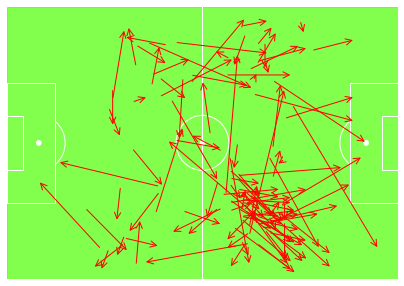

In [89]:
fig=plt.figure() 
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch1(ax)
for i in range(len(Jor_pas)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Jor_pas.iloc[i]['pass_end_location']['x']*120/100, Jor_pas.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Jor_pas.iloc[i]['location']['x']*120/100, Jor_pas.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.show()
ax.clear()
plt.close(fig)


### Jorginho's completed passes

In [90]:
Jor_complete = []
for i in range(len(Jor_passes)):
    if {'id': 1801} in Jor_passes.tags.iloc[i]:
        Jor_complete.append(Jor_passes.iloc[i])

In [91]:
Jor_complete = pd.DataFrame(Jor_complete)
Jor_cpos = pd.DataFrame({'location' : [i[0] for i in Jor_complete.positions], 'pass_end_location' : [i[1] for i in Jor_complete.positions]})

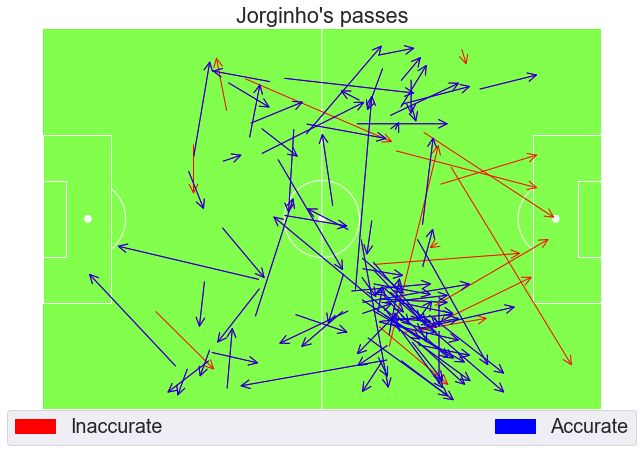

In [92]:
fig=plt.figure() 
fig.set_size_inches(10, 7)
ax=fig.add_subplot(1,1,1)
sns.set(font_scale=1.8)
draw_pitch1(ax)
for i in range(len(Jor_pas)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Jor_pas.iloc[i]['pass_end_location']['x']*120/100, Jor_pas.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Jor_pas.iloc[i]['location']['x']*120/100, Jor_pas.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))
for i in range(len(Jor_cpos)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Jor_cpos.iloc[i]['pass_end_location']['x']*120/100, Jor_cpos.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Jor_cpos.iloc[i]['location']['x']*120/100, Jor_cpos.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
plt.title("Jorginho's passes")
plt.legend(handles = [mpatches.Patch(color= "red", label='Inaccurate'),mpatches.Patch(color= "blue", label='Accurate')], loc='lower left',
           ncol=2, mode="expand", borderaxespad=-1.8)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.show()
ax.clear()
plt.close(fig)


As this graph shows, Jorginho had a good percentage of completed passes over his total passes. It also appears that his passes were mostly succesful on the wings and in short passes, but quite unsuccesful towards the opponent's goal and in longer passes.

## Pjanic

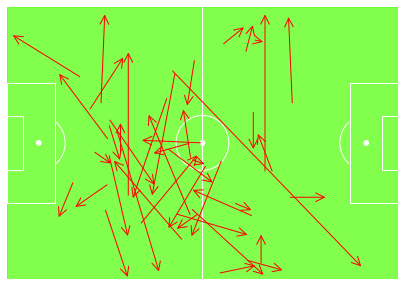

In [93]:
Pja_ev = Juv_Nap[Juv_Nap.playerId == Pja]
Pja_passes = Pja_ev[Pja_ev.eventName == 'Pass']
Pja_pas = Pja_passes.positions
Pja_pas = pd.DataFrame({'location' : [i[0] for i in Pja_pas], 'pass_end_location' : [i[1] for i in Pja_pas]})

fig=plt.figure() 
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch1(ax)
for i in range(len(Pja_pas)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Pja_pas.iloc[i]['pass_end_location']['x']*120/100, Pja_pas.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Pja_pas.iloc[i]['location']['x']*120/100, Pja_pas.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))

plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.show()
ax.clear()
plt.close(fig)


The map of Pjanic's passes looks less dense than Jorginho's. As a matter of fact, Pjanic has carried out less than half of Jorginho's passes.

In [94]:
print("Jorginho's passes : {}".format(len(Jor_passes)), "\nPjanic's passes : {}".format(len(Pja_passes)))

Jorginho's passes : 114 
Pjanic's passes : 44


### Pjanic's completed passes

In [95]:
Pja_complete = []
for i in range(len(Pja_passes)):
    if {'id': 1801} in Pja_passes.tags.iloc[i]:
        Pja_complete.append(Pja_passes.iloc[i])

In [96]:
Pja_complete = pd.DataFrame(Pja_complete)
Pja_cpos = pd.DataFrame({'location' : [i[0] for i in Pja_complete.positions], 'pass_end_location' : [i[1] for i in Pja_complete.positions]})

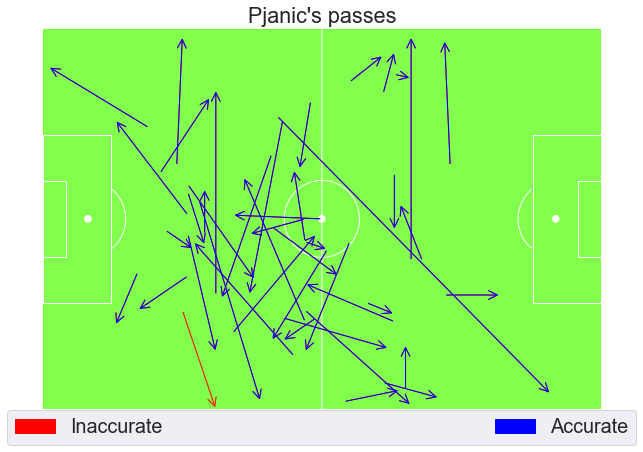

In [97]:
fig=plt.figure() 
fig.set_size_inches(10, 7)
ax=fig.add_subplot(1,1,1)
draw_pitch1(ax)
sns.set(font_scale=1.8)
for i in range(len(Pja_pas)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Pja_pas.iloc[i]['pass_end_location']['x']*120/100, Pja_pas.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Pja_pas.iloc[i]['location']['x']*120/100, Pja_pas.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))

for i in range(len(Pja_cpos)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Pja_cpos.iloc[i]['pass_end_location']['x']*120/100, Pja_cpos.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Pja_cpos.iloc[i]['location']['x']*120/100, Pja_cpos.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.title("Pjanic's passes")
plt.legend(handles = [mpatches.Patch(color= "red", label='Inaccurate'),mpatches.Patch(color= "blue", label='Accurate')], loc='lower left',
           ncol=2, mode="expand", borderaxespad=-1.8)
plt.show()
ax.clear()
plt.close(fig)


### Now a comparison between Pjanic and Jorginho

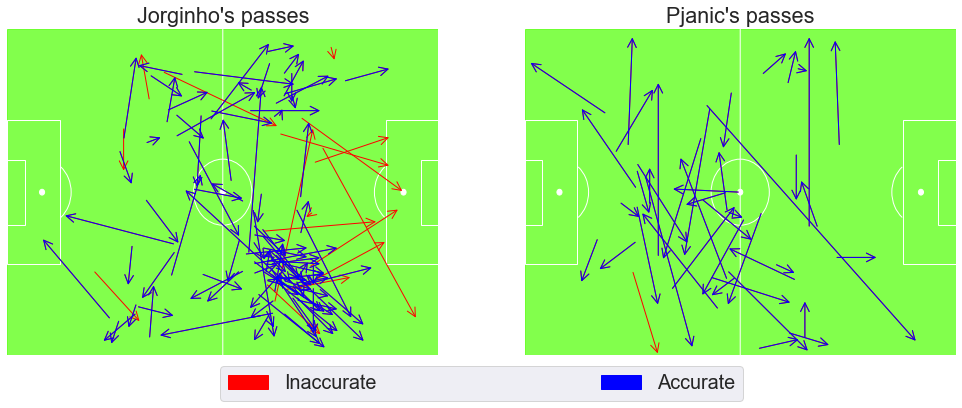

In [98]:
fig=plt.figure() 
fig.set_size_inches(17, 6)
ax=fig.add_subplot(1,2,1)
draw_pitch1(ax)
sns.set(font_scale=1.8)

plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
for i in range(len(Jor_pas)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Jor_pas.iloc[i]['pass_end_location']['x']*120/100, Jor_pas.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Jor_pas.iloc[i]['location']['x']*120/100, Jor_pas.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))
for i in range(len(Jor_cpos)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax.annotate("", xy = (Jor_cpos.iloc[i]['pass_end_location']['x']*120/100, Jor_cpos.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Jor_cpos.iloc[i]['location']['x']*120/100, Jor_cpos.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
plt.title("Jorginho's passes")
plt.legend(handles = [mpatches.Patch(color= "red", label='Inaccurate'),mpatches.Patch(color= "blue", label='Accurate')], loc='lower center',
           ncol=2, mode = 'expand', borderaxespad=-2.3, bbox_to_anchor=(0.6, 0, 1, 1))

ax1=fig.add_subplot(1,2,2)

for i in range(len(Pja_pas)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax1.annotate("", xy = (Pja_pas.iloc[i]['pass_end_location']['x']*120/100, Pja_pas.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Pja_pas.iloc[i]['location']['x']*120/100, Pja_pas.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))

for i in range(len(Pja_cpos)):
    # annotate draw an arrow from a current position to pass_end_location, the coordinates are rescaled as before
    ax1.annotate("", xy = (Pja_cpos.iloc[i]['pass_end_location']['x']*120/100, Pja_cpos.iloc[i]['pass_end_location']['y']*80/100), xycoords = 'data',
               xytext = (Pja_cpos.iloc[i]['location']['x']*120/100, Pja_cpos.iloc[i]['location']['y']*80/100), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
draw_pitch1(ax1)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.axis('off')
plt.title("Pjanic's passes")
plt.show()
ax.clear()
ax1.clear()
plt.close(fig)


### Although sparser and not localized to a specific area of the pitch, Pjanic had a completion rate of almost 100% for his passes, having carried out only one inaccurate pass during the match. It also appears that Pjanic carried out mostly long passes through the central area of the pitch, often aiming backwards, while Jorginho carried out mostly short passes in the advanced area of the pitch, often aiming onwards. 